# Climate Change Insights: Probabilistic Analysis of Earth Surface Temperatures

### Importing Libraries

In [1]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import math
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C



## Introduction

Climate change poses one of the most critical challenges of the modern era, and understanding historical temperature trends is a key step in predicting and mitigating its effects. As global temperatures continue to rise, understanding the historical patterns of temperature fluctuations is crucial for predicting future climate scenarios. By analyzing these trends, we can better anticipate the impacts of climate change, develop effective mitigation strategies, and work towards a sustainable future. Addressing this complex issue requires informed, data-driven decision-making to safeguard the planet for generations to come.


## Dataset Overview

This project utilizes the "GlobalTemperatures.csv" dataset from the Berkeley Earth Surface Temperature Study to analyze and forecast global temperature trends using over a century of meteorological data. This dataset provides comprehensive temperature measurements with associated uncertainties.

The dataset includes:

**Global Land and Ocean Temperatures:** Average, maximum, and minimum temperatures for global land and ocean areas.

**Uncertainty Measures:** Representing 95% confidence intervals, accounting for historical data collection challenges like thermometer variations and relocation of weather stations.

The Features:

**Date:** starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures

**LandAverageTemperature:** global average land temperature in celsius

**LandAverageTemperatureUncertainty:** the 95% confidence interval around the average

**LandMaxTemperature:** global average maximum land temperature in celsius

**LandMaxTemperatureUncertainty:** the 95% confidence interval around the maximum land temperature

**LandMinTemperature:** global average minimum land temperature in celsius

**LandMinTemperatureUncertainty:** the 95% confidence interval around the minimum land temperature

**LandAndOceanAverageTemperature:** global average land and ocean temperature in celsius

**LandAndOceanAverageTemperatureUncertainty:** the 95% confidence interval around the global average land and ocean temperature



## Project Objectives

**Forecasting Global Temperatures:**
The primary goal is to forecast global average land and ocean temperatures using historical data, acting as though weather forecasts are unavailable. By leveraging this long-term dataset, the project seeks to predict future trends in:

- Global average land temperatures.
- Global average ocean and land combined temperatures.
- Maximum and minimum global temperatures.


**Probabilistic Analysis:**

Incorporate uncertainty values to:

- Evaluate the reliability of predictions.
- Detect anomalies and assess long-term trends.


**Supervised Learning Framework:**

This forecasting task is framed as a supervised machine learning problem, where:

- Features: Historical temperature data, including global averages, maxima, and minima.
- Target Variable: Future global average temperatures (continuous).

Since the target variable is continuous, this task falls under the domain of regression. Multiple regression models will be trained on the features and target variables, learning how to map historical data to predictions effectively.

**Regression Modeling:**

The focus on regression is driven by the continuous nature of the target variable, as opposed to classification tasks that deal with discrete classes. During the training phase, models will learn to:
- Accurately map historical temperature features to predict future trends.
- Incorporate and adjust for uncertainty measures to improve prediction reliability.

By combining probabilistic analysis with supervised regression models, this project aims to uncover actionable insights about historical and future global temperature trends. This work contributes to the broader understanding of climate dynamics, supporting data-driven policy decisions in addressing climate change.

This analysis is important as it helps forecast future global temperature trends, a critical aspect of understanding climate change. By leveraging historical temperature data, including land, ocean, and combined averages, along with uncertainty measures, this study provides valuable insights into future climate dynamics. The results can support climate change mitigation strategies, inform policy decisions, and aid in preparing for extreme temperature events. Through machine learning models like Random Forest, LSTM, ARIMA, Bayesian Time series model and SARIMA, this analysis also enhances predictive accuracy, offering a robust framework for managing the long-term impacts of climate change.

### Dataset Loading

In [3]:
# Loading the dataset

Climate_df = pd.read_csv("/content/GlobalTemperatures.csv")


In [4]:
Climate_df.head()


dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [5]:
Climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
Climate_df.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

In [7]:
Climate_df.shape

(3192, 9)

In [8]:
Climate_df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

MICE Implementation

Multiple Imputation by Chained Equations (MICE), which is a probabilistic method that models uncertainty in the missing data.


predicts the missing values probabilistically


In [9]:
from sklearn.experimental import enable_iterative_imputer  # Necessary to enable IterativeImputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Define the columns with missing values
columns_to_impute = [
    'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
    'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
    'LandMinTemperature', 'LandMinTemperatureUncertainty',
    'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'
]

# Create a copy of the original dataframe to preserve it
cleaned_climate_df = Climate_df.copy()

# Initialize the probabilistic MICE imputer with posterior sampling enabled
mice_imputer = IterativeImputer(max_iter=10, random_state=42, sample_posterior=True)

# Apply the probabilistic MICE imputation to the relevant columns
cleaned_climate_df[columns_to_impute] = mice_imputer.fit_transform(cleaned_climate_df[columns_to_impute])

# Check if all missing values have been handled
print("Missing values after probabilistic MICE imputation:")
print(cleaned_climate_df[columns_to_impute].isnull().sum())

# Inspect the dataset after imputation
cleaned_climate_df.info()


Missing values after probabilistic MICE imputation:
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3192 non-null   float64
 2   LandAverageTemperatureUncertainty          3192 non-null   float64
 3   LandMaxTemperature                         3192 non-null   float64
 4   LandMaxTemperatu

## Pre-processing

In [10]:
def convertToDateTime(df):
    # Create a copy of the dataframe to avoid modifying the original
    df = df.copy()
    df['dt'] = pd.to_datetime(df['dt'])

    # Extract 'Month' and 'Year' from the DateTime object
    df['Month'] = df['dt'].dt.month
    df['Year'] = df['dt'].dt.year

    return df

# Apply the function to the cleaned dataframe
cleaned_climate_df = convertToDateTime(cleaned_climate_df)

# Drop 'Date' and 'Month' columns, as they are no longer needed
cleaned_climate_df = cleaned_climate_df.drop(['dt', 'Month'], axis=1)

# Set 'Year' as the index of the dataframe
cleaned_climate_df = cleaned_climate_df.set_index('Year')

# Display the first few rows of the modified dataframe
cleaned_climate_df.head()


LandAverageTemperature  LandAverageTemperatureUncertainty  \
Year                                                              
1750                   3.034                              3.574   
1750                   3.083                              3.702   
1750                   5.626                              3.076   
1750                   8.490                              2.451   
1750                  11.573                              2.072   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
Year                                                                          
1750            9.869315                       7.964943           -4.036156   
1750            9.703770                       7.398290           -4.142811   
1750           11.981451                       5.908021           -0.740121   
1750           16.210292                       5.233156            3.082073   
1750           17.585716                       4.415546            6.211187   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
Year                                                                  
1750                       6.515813                       12.515399   
1750                       6.083680                       11.918020   
1750                       5.150168                       13.425853   
1750                       3.922187                       14.140938   
1750                       3.592351                       15.671558   

      LandAndOceanAverageTemperatureUncertainty  
Year                                             
1750                                   1.177244  
1750                                   1.194091  
1750                                   0.968088  
1750                                   0.795197  
1750                                   0.660805

In [11]:
# Convert the relevant temperature columns to Fahrenheit and update the existing columns
temperature_columns = [
    'LandAverageTemperature', 'LandMaxTemperature',
    'LandMinTemperature', 'LandAndOceanAverageTemperature'
]

for col in temperature_columns:
    cleaned_climate_df[col] = (cleaned_climate_df[col] * 9/5) + 32

# Display the first few rows of the modified dataframe
cleaned_climate_df.head()


LandAverageTemperature  LandAverageTemperatureUncertainty  \
Year                                                              
1750                 37.4612                              3.574   
1750                 37.5494                              3.702   
1750                 42.1268                              3.076   
1750                 47.2820                              2.451   
1750                 52.8314                              2.072   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
Year                                                                          
1750           49.764767                       7.964943           24.734919   
1750           49.466786                       7.398290           24.542940   
1750           53.566612                       5.908021           30.667782   
1750           61.178526                       5.233156           37.547731   
1750           63.654288                       4.415546           43.180137   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
Year                                                                  
1750                       6.515813                       54.527718   
1750                       6.083680                       53.452436   
1750                       5.150168                       56.166536   
1750                       3.922187                       57.453688   
1750                       3.592351                       60.208805   

      LandAndOceanAverageTemperatureUncertainty  
Year                                             
1750                                   1.177244  
1750                                   1.194091  
1750                                   0.968088  
1750                                   0.795197  
1750                                   0.660805

In [12]:
cleaned_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3192 entries, 1750 to 2015
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3192 non-null   float64
 1   LandAverageTemperatureUncertainty          3192 non-null   float64
 2   LandMaxTemperature                         3192 non-null   float64
 3   LandMaxTemperatureUncertainty              3192 non-null   float64
 4   LandMinTemperature                         3192 non-null   float64
 5   LandMinTemperatureUncertainty              3192 non-null   float64
 6   LandAndOceanAverageTemperature             3192 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  3192 non-null   float64
dtypes: float64(8)
memory usage: 212.0 KB


## Exploratory Data Analysis

## Boxplots

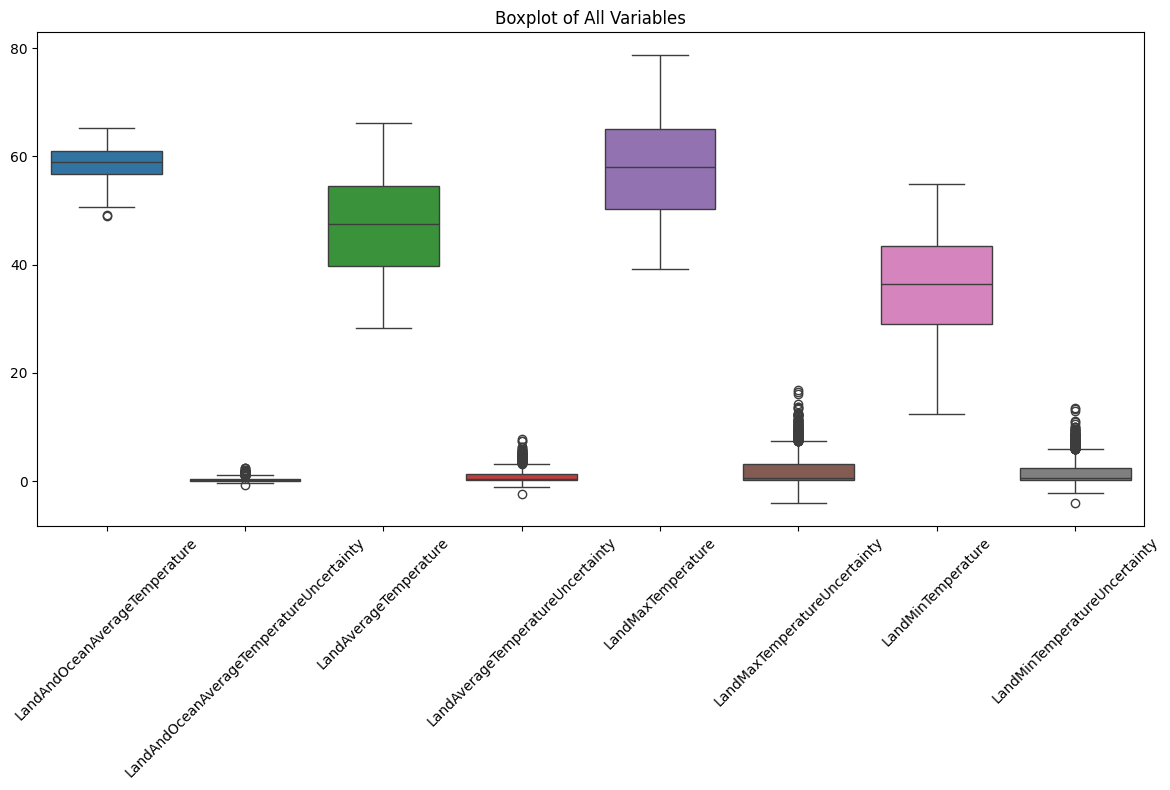

In [13]:
# List all columns except 'dt' from the cleaned dataframe
columns_to_plot = cleaned_climate_df.columns.difference(['dt'])

# Create a boxplot for all columns except 'dt'
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_climate_df[columns_to_plot])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title("Boxplot of All Variables")
plt.tight_layout()
plt.show()


## Temperature Trends Over Time

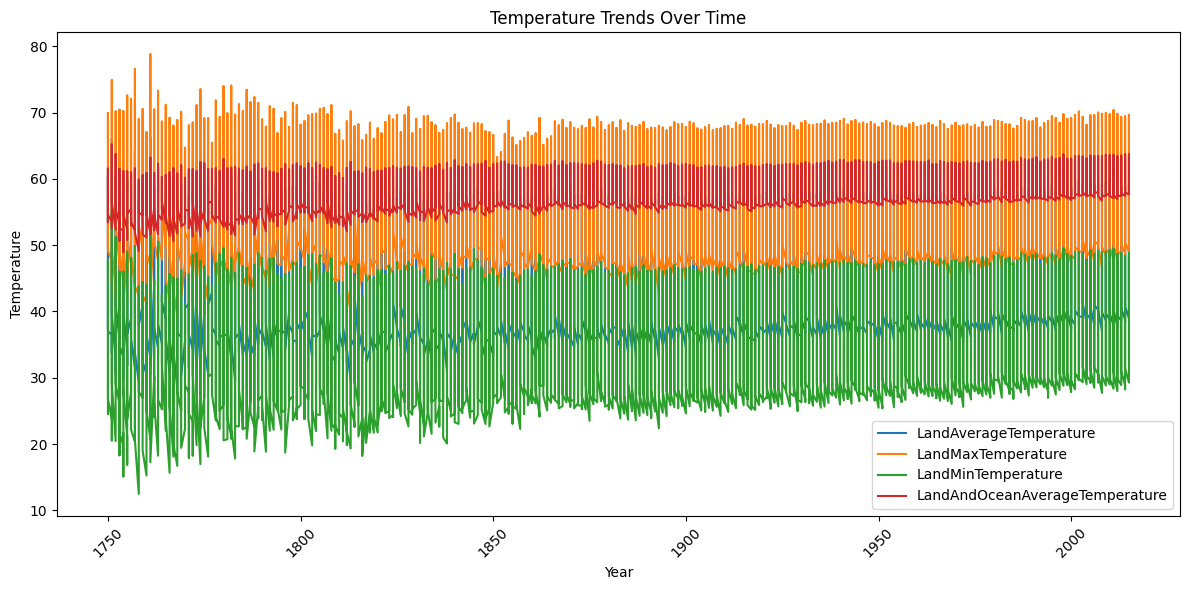

In [14]:
# Plot the time series for key temperature columns
plt.figure(figsize=(12, 6))
for col in ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']:
    plt.plot(cleaned_climate_df.index, cleaned_climate_df[col], label=col)

plt.title("Temperature Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Univariate Analysis

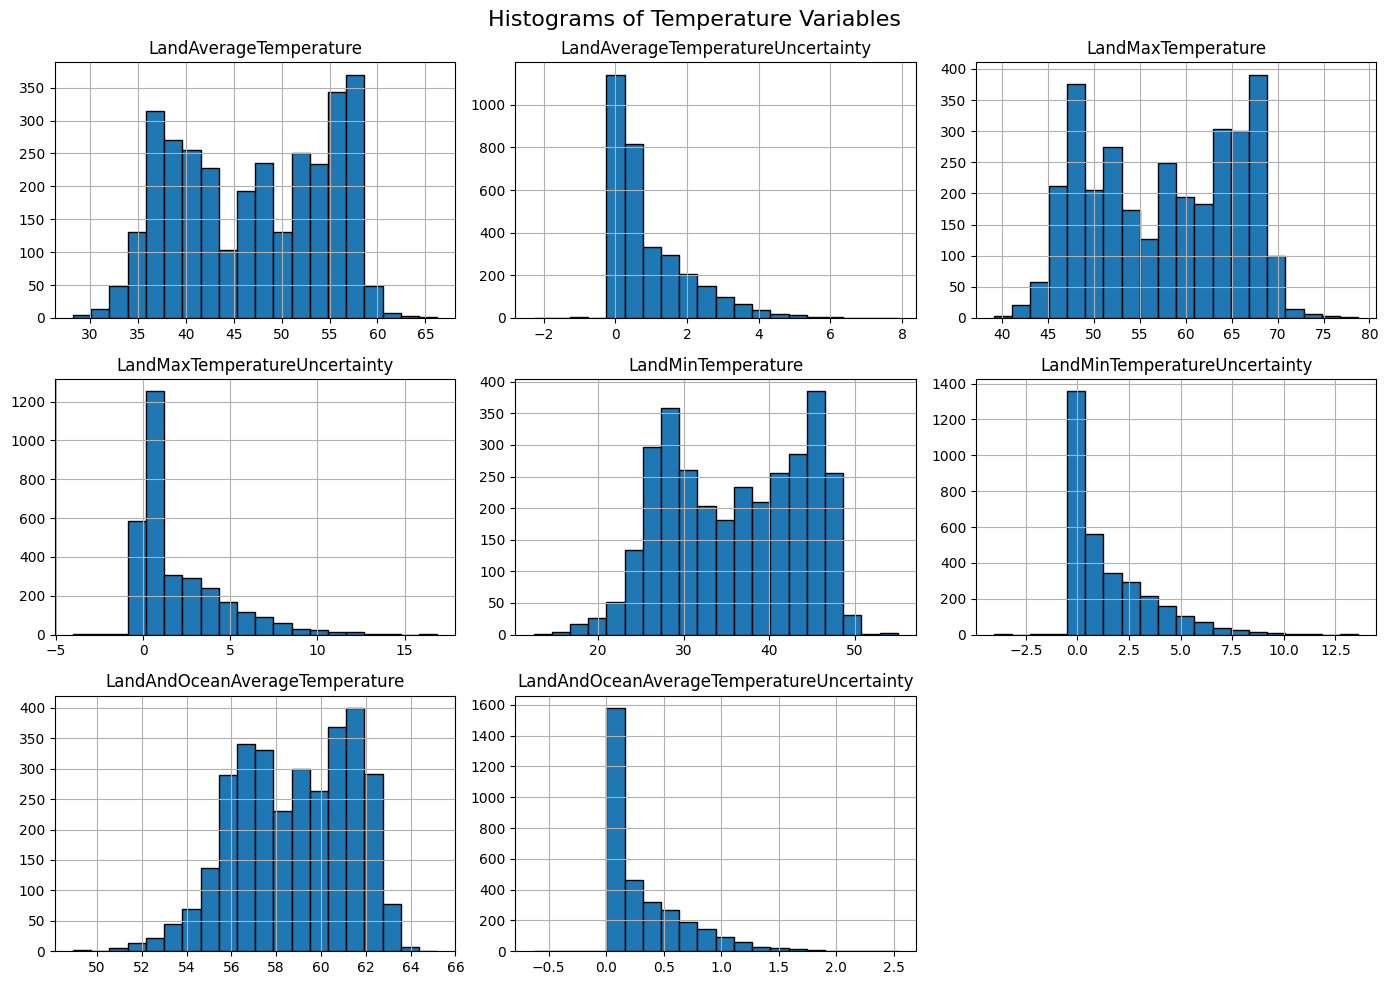

In [15]:
# Plot histograms for all variables
cleaned_climate_df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Temperature Variables", fontsize=16)
plt.tight_layout()
plt.show()


## Pair Plot Analysis

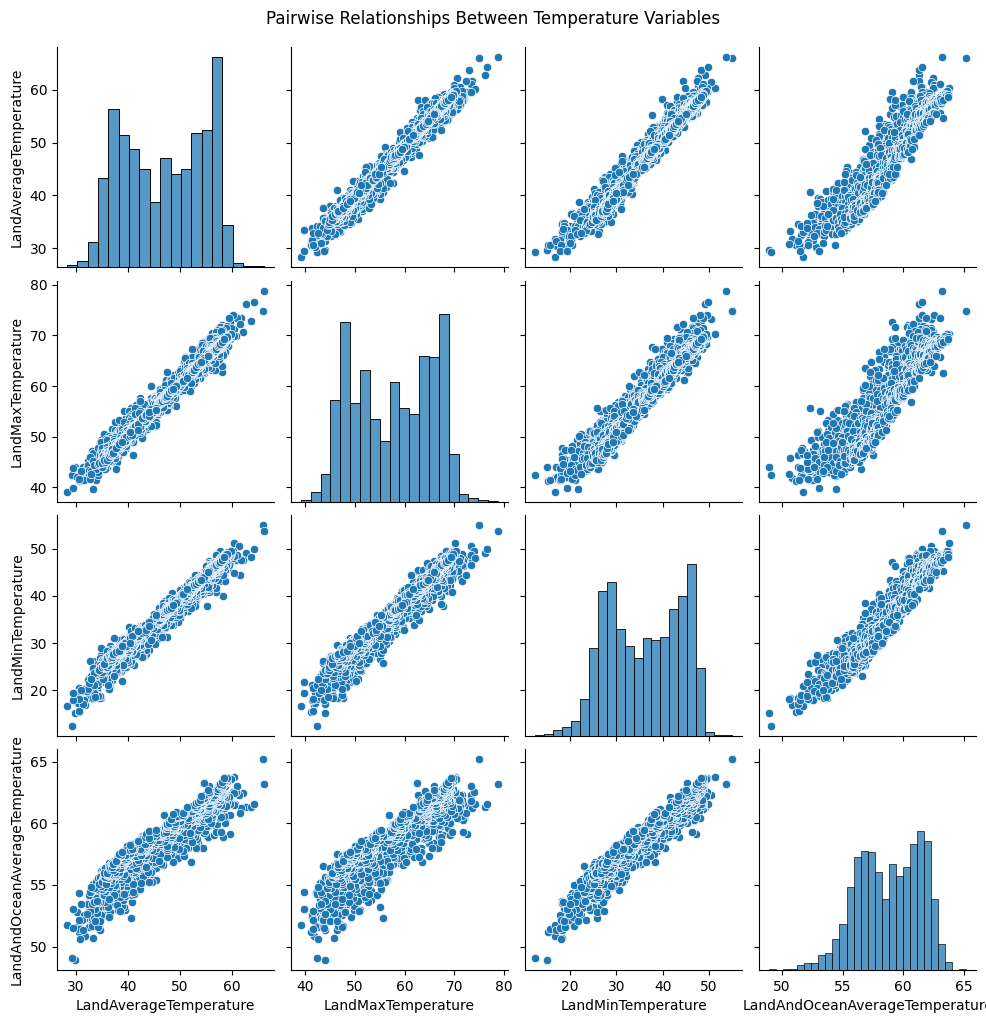

In [16]:
# Plot pairplot for key temperature columns
sns.pairplot(cleaned_climate_df[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']])
plt.suptitle("Pairwise Relationships Between Temperature Variables", y=1.02)
plt.show()


## Seasonal Decomposition of Temperatures

<Figure size 1200x800 with 0 Axes>

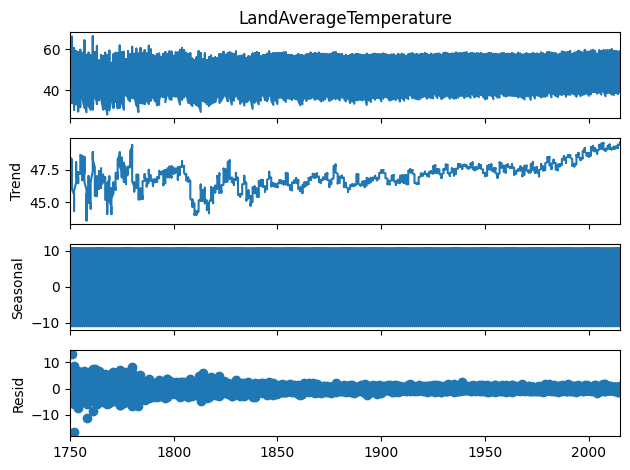

In [17]:
# Decompose the LandAverageTemperature data
decomposition = seasonal_decompose(cleaned_climate_df['LandAverageTemperature'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

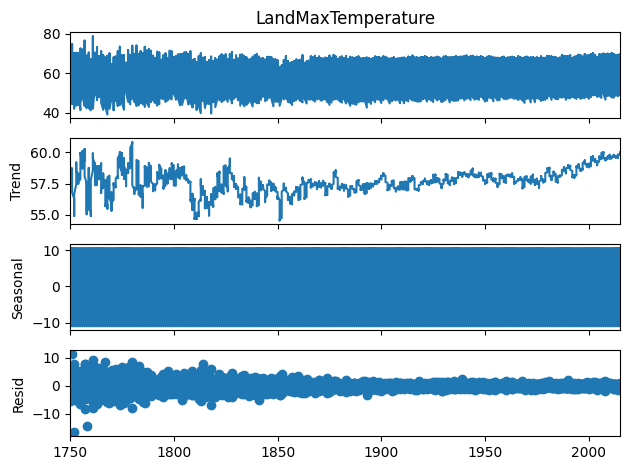

In [18]:
# Decompose the LandAverageTemperature data
decomposition = seasonal_decompose(cleaned_climate_df['LandMaxTemperature'], model='additive', period=12)
# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

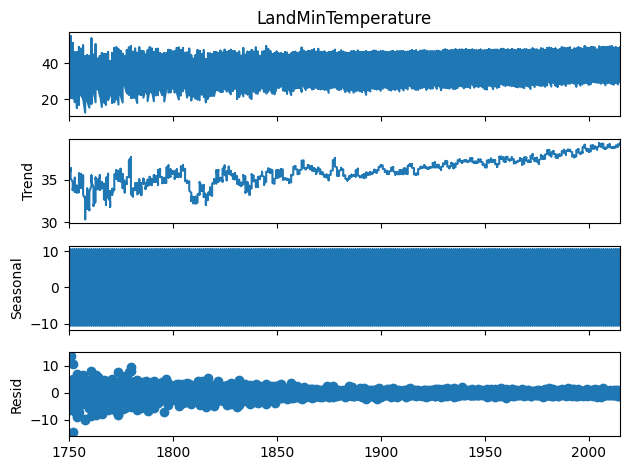

In [19]:
# Decompose the LandAverageTemperature data
decomposition = seasonal_decompose(cleaned_climate_df['LandMinTemperature'], model='additive', period=12)
# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

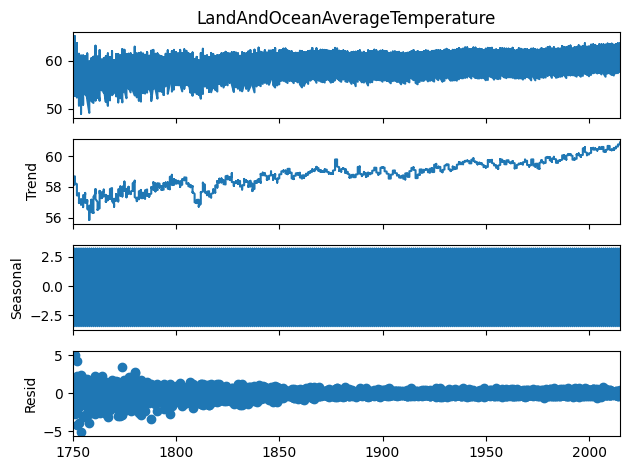

In [20]:
# Decompose the LandAverageTemperature data
decomposition = seasonal_decompose(cleaned_climate_df['LandAndOceanAverageTemperature'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()


## Temperature Trends with Uncertainty Boundaries

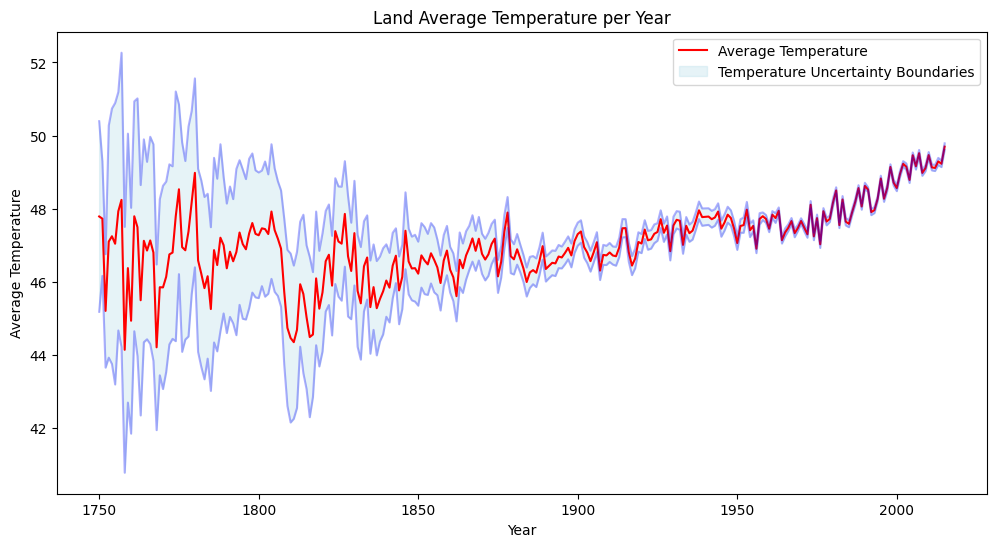

In [21]:
def plot_average_temp(df, col1, col2, label):
    # Select the relevant columns
    cols = [col1, col2]
    temp_df = df[cols]

    # Group by the index (Year in this case) and calculate the average for each year
    average_per_year = temp_df.groupby(temp_df.index)[cols].mean()

    # Calculate the temperature uncertainty boundaries
    average_per_year['lower temp'] = average_per_year[col1] - average_per_year[col2]
    average_per_year['upper temp'] = average_per_year[col1] + average_per_year[col2]

    # Plot the average temperature and the uncertainty boundaries
    plt.figure(figsize=(12,6))
    plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average Temperature')
    plt.plot(average_per_year.index, average_per_year['upper temp'], color='blue', alpha=0.3)
    plt.plot(average_per_year.index, average_per_year['lower temp'], color='blue', alpha=0.3)
    plt.fill_between(average_per_year.index, average_per_year['upper temp'], average_per_year['lower temp'], color='lightblue', alpha=0.3, label='Temperature Uncertainty Boundaries')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Average Temperature')
    plt.title(label)
    plt.legend(loc='best')

# Land Average Temperature
plot_average_temp(cleaned_climate_df, 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'Land Average Temperature per Year')


# Show the plot
plt.show()


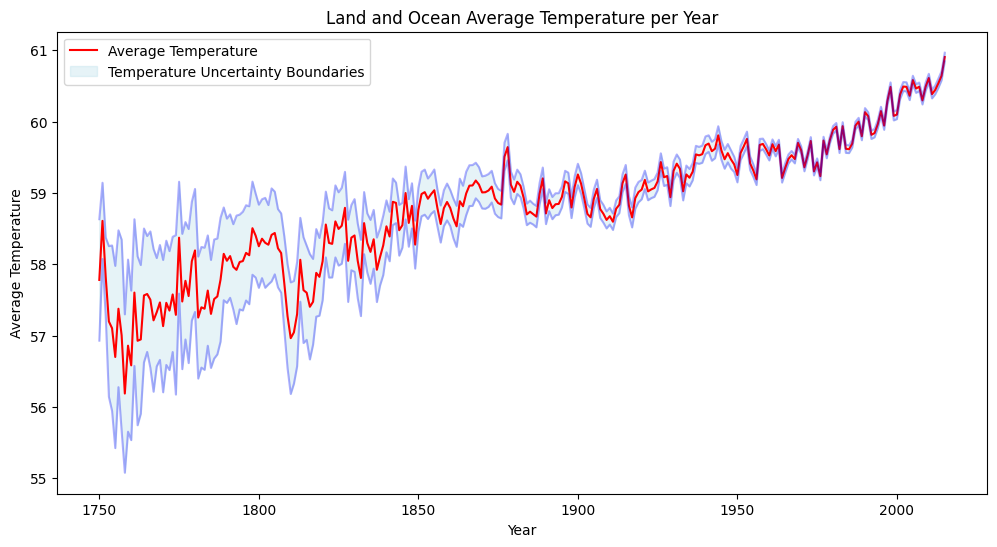

In [22]:
# Land and Ocean Average Temperature
plot_average_temp(cleaned_climate_df, 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty', 'Land and Ocean Average Temperature per Year')



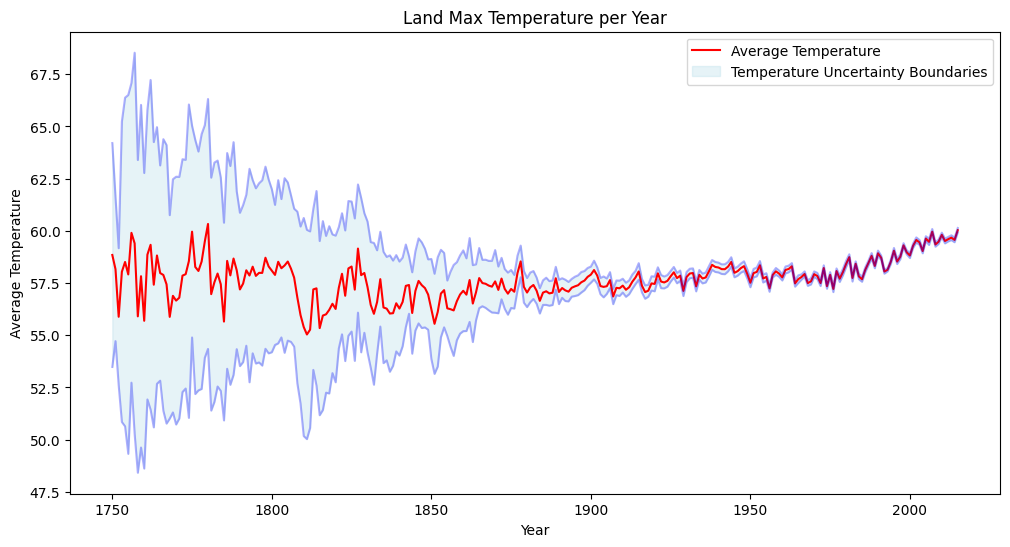

In [23]:
# Land Max Temperature
plot_average_temp(cleaned_climate_df, 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'Land Max Temperature per Year')


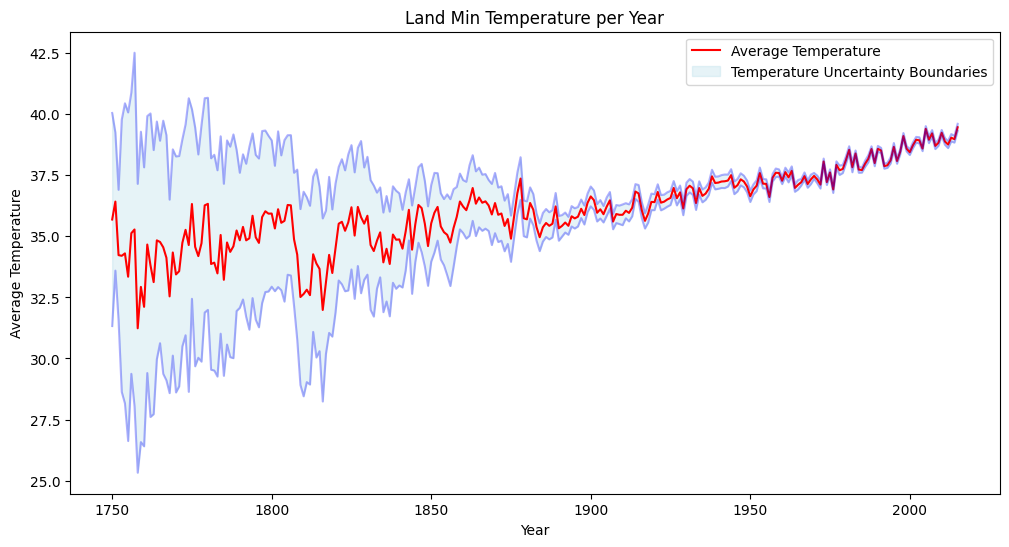

In [24]:
# Land Min Temperature
plot_average_temp(cleaned_climate_df, 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'Land Min Temperature per Year')



## Data-splitting

In [25]:
# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train, test = cleaned_climate_df[:train_size], cleaned_climate_df[train_size:]

# Display the split
print(f"Training data size: {len(train)}")
print(f"Testing data size: {len(test)}")


Training data size: 2553
Testing data size: 639


## Modelling - Predicting "LandAverageTemperature"

## ARIMA

<ipython-input-26-77c35e690eaa>:6: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)


ARIMA Model MAE for LandAverageTemperature: 0.7410
ARIMA Model MSE for LandAverageTemperature: 0.8804
ARIMA Model RMSE for LandAverageTemperature: 0.9383


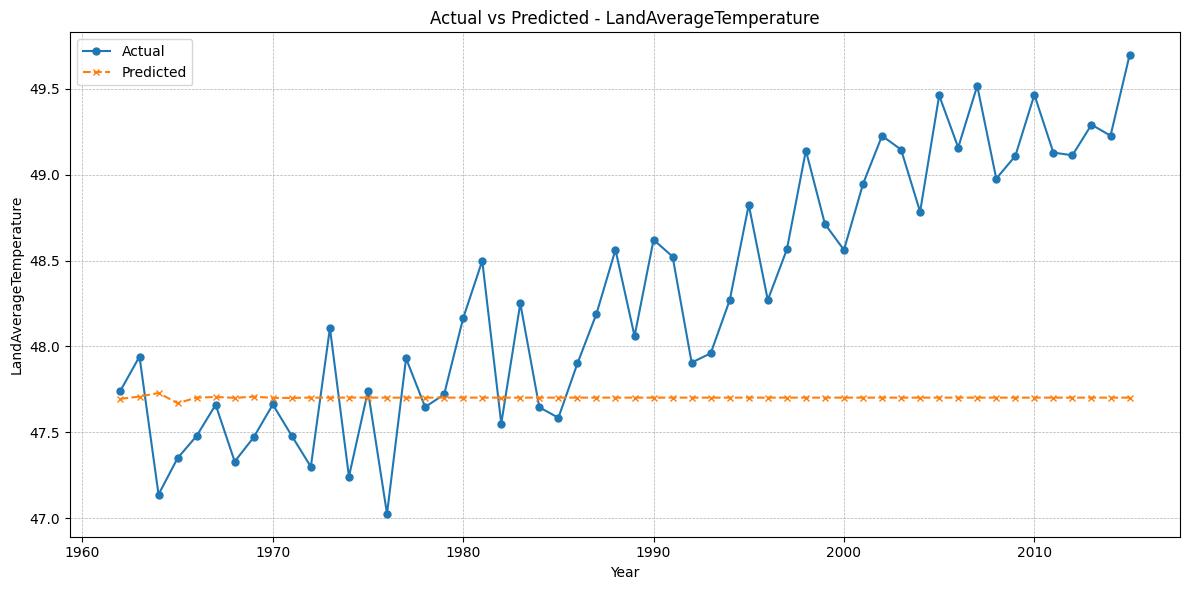

In [26]:
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)

# Convert 'Year' to a DatetimeIndex with annual frequency
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)

# Select the target column
target_column = 'LandAverageTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data for ARIMA
train_data = train[target_column]
test_data = test[target_column]

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast for test data
forecast = arima_result.forecast(steps=len(test_data))

# Calculate metrics
mae_arima = mean_absolute_error(test_data, forecast)
mse_arima = mean_squared_error(test_data, forecast)
rmse_arima = np.sqrt(mse_arima)

# Print results
print(f"ARIMA Model MAE for {target_column}: {mae_arima:.4f}")
print(f"ARIMA Model MSE for {target_column}: {mse_arima:.4f}")
print(f"ARIMA Model RMSE for {target_column}: {rmse_arima:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o', linestyle='-', markersize=5)
plt.plot(test_data.index, forecast, label='Predicted', marker='x', linestyle='--', markersize=5)
plt.title(f"Actual vs Predicted - {target_column}")
plt.xlabel("Year")
plt.ylabel(target_column)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## SARIMA

<ipython-input-27-624a65e6507d>:5: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=583.644, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=492.065, Time=0.71 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=563.662, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=488.712, Time=1.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.28 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=514.055, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=478.667, Time=0.58 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=481.205, Time=0.19 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=458.442, Time=0.66 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=456.327, Time=1.62 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=459.218, T

<ipython-input-27-624a65e6507d>:51: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  future_index = pd.date_range(start=test_data.index[-1],


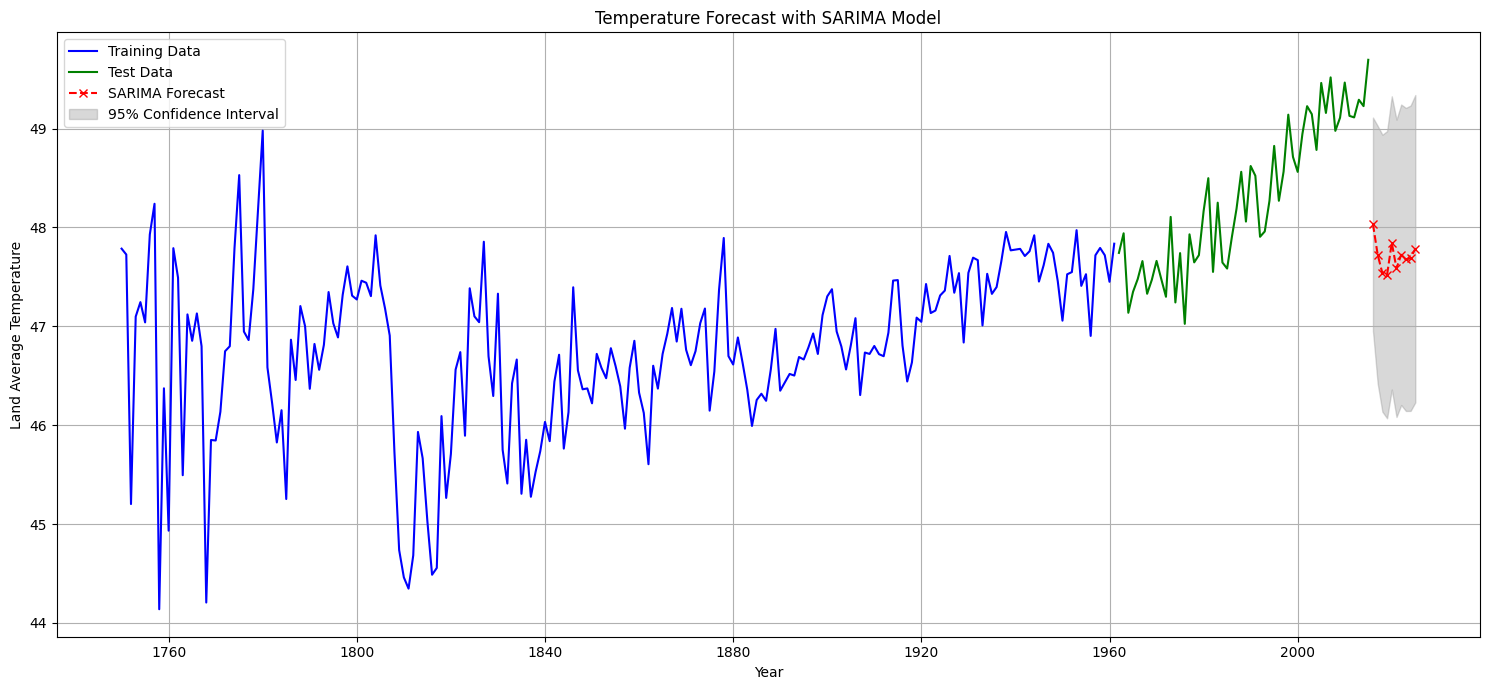


Forecast Results:
Year: 2016
Predicted Temperature: 48.03°C
95% CI: (46.95, 49.11)
---
Year: 2017
Predicted Temperature: 47.72°C
95% CI: (46.42, 49.03)
---
Year: 2018
Predicted Temperature: 47.54°C
95% CI: (46.14, 48.94)
---
Year: 2019
Predicted Temperature: 47.52°C
95% CI: (46.07, 48.97)
---
Year: 2020
Predicted Temperature: 47.84°C
95% CI: (46.36, 49.33)
---
Year: 2021
Predicted Temperature: 47.59°C
95% CI: (46.08, 49.09)
---
Year: 2022
Predicted Temperature: 47.72°C
95% CI: (46.20, 49.24)
---
Year: 2023
Predicted Temperature: 47.68°C
95% CI: (46.14, 49.21)
---
Year: 2024
Predicted Temperature: 47.69°C
95% CI: (46.14, 49.23)
---
Year: 2025
Predicted Temperature: 47.78°C
95% CI: (46.23, 49.34)
---

Model Performance Metrics:
RMSE: 4.1625
MAE: 1.1069
MSE: 17.3261


<ipython-input-27-624a65e6507d>:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")


In [27]:
# Data preparation
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')

# Select target column
target_column = 'LandAverageTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data
train_data = train[target_column]
test_data = test[target_column]

# Find optimal SARIMA parameters using auto_arima
auto_model = auto_arima(train_data,
                       seasonal=True,
                       m=12,  # Annual seasonality
                       start_p=0, start_q=0,
                       max_p=5, max_q=5,
                       start_P=0, start_Q=0,
                       max_P=2, max_Q=2,
                       d=1, D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True)

print("Best SARIMA parameters:", auto_model.order, auto_model.seasonal_order)

# Fit SARIMA model with the best parameters
sarima_model = SARIMAX(train_data,
                      order=(1, 1, 1),           # (p,d,q)
                      seasonal_order=(1, 1, 1, 12), # (P,D,Q,s)
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_results = sarima_model.fit()
print(sarima_results.summary())

# Forecast future values
forecast_steps = 10
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Generate future index for plotting
future_index = pd.date_range(start=test_data.index[-1],
                           periods=forecast_steps + 1,
                           freq='AS-JAN')[1:]

# Plotting
plt.figure(figsize=(15, 7))

# Plot actual historical data
plt.plot(train_data.index, train_data,
         label='Training Data',
         color='blue')

# Plot test data
plt.plot(test_data.index, test_data,
         label='Test Data',
         color='green')

# Plot forecasted data
plt.plot(future_index, forecast_mean,
         label='SARIMA Forecast',
         color='red',
         linestyle='--',
         marker='x')

# Plot confidence intervals
plt.fill_between(future_index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color='gray',
                alpha=0.3,
                label='95% Confidence Interval')

# Customize plot
plt.title('Temperature Forecast with SARIMA Model')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecast results
print("\nForecast Results:")
for i in range(len(forecast_mean)):
    print(f"Year: {future_index[i].year}")
    print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")
    print(f"95% CI: ({conf_int.iloc[i, 0]:.2f}, {conf_int.iloc[i, 1]:.2f})")
    print("---")

# Calculate error metrics for training period
train_pred = sarima_results.get_prediction(start=train_data.index[0])
train_mean = train_pred.predicted_mean

# Calculate RMSE, MAE, and MSE
rmse_sarima = math.sqrt(mean_squared_error(train_data, train_mean))
mae_sarima = mean_absolute_error(train_data, train_mean)
mse_sarima = mean_squared_error(train_data, train_mean)

print("\nModel Performance Metrics:")
print(f"RMSE: {rmse_sarima:.4f}")
print(f"MAE: {mae_sarima:.4f}")
print(f"MSE: {mse_sarima:.4f}")



## LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1814
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0288
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0285
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0221
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0202
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0210
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0221
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0186
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0167
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0184
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0185
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0153
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0154
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0184
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━

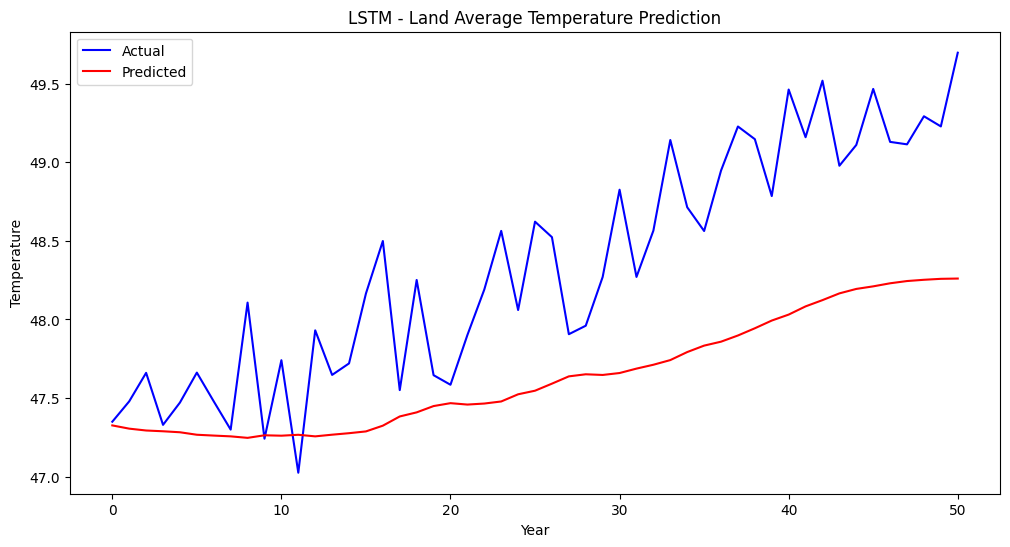

LSTM Model MAE for LandAverageTemperature: 0.7074061370251223
LSTM Model MSE for LandAverageTemperature: 0.6782567279688482
LSTM Model RMSE for LandAverageTemperature: 0.8235634328749961


In [28]:
# Prepare the dataset for LSTM for LandAverageTemperature
temp_column = 'LandAverageTemperature'

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_avg = scaler.fit_transform(cleaned_climate_df[[temp_column]].values)

# Create a dataset with a lookback window of 12 months (1 year)
lookback = 12

def create_dataset(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_avg, y_avg = create_dataset(scaled_data_avg, lookback)

# Reshaping input data to be 3D for LSTM [samples, time steps, features]
X_avg = X_avg.reshape(X_avg.shape[0], X_avg.shape[1], 1)

# Split the data into training and test sets
train_size_avg = int(len(X_avg) * 0.8)
X_train_avg, X_test_avg = X_avg[:train_size_avg], X_avg[train_size_avg:]
y_train_avg, y_test_avg = y_avg[:train_size_avg], y_avg[train_size_avg:]

# Build the LSTM model for LandAverageTemperature
model_avg = Sequential()
model_avg.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_avg.shape[1], 1)))
model_avg.add(Dropout(0.2))
model_avg.add(LSTM(units=50, return_sequences=False))
model_avg.add(Dropout(0.2))
model_avg.add(Dense(units=1))

model_avg.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_avg.fit(X_train_avg, y_train_avg, epochs=20, batch_size=32)

# Make predictions
predictions_avg = model_avg.predict(X_test_avg)
predictions_avg = scaler.inverse_transform(predictions_avg)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_avg)), scaler.inverse_transform(y_test_avg.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(range(len(predictions_avg)), predictions_avg, color='red', label='Predicted')
plt.title('LSTM - Land Average Temperature Prediction')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Evaluate performance
mae_lstm = mean_absolute_error(scaler.inverse_transform(y_test_avg.reshape(-1, 1)), predictions_avg)
mse_lstm = mean_squared_error(scaler.inverse_transform(y_test_avg.reshape(-1, 1)), predictions_avg)
rmse_lstm= np.sqrt(mse_lstm)

print(f'LSTM Model MAE for LandAverageTemperature: {mae_lstm}')
print(f'LSTM Model MSE for LandAverageTemperature: {mse_lstm}')
print(f'LSTM Model RMSE for LandAverageTemperature: {rmse_lstm}')


## Gaussian Process Regression (GPR) for Time Series

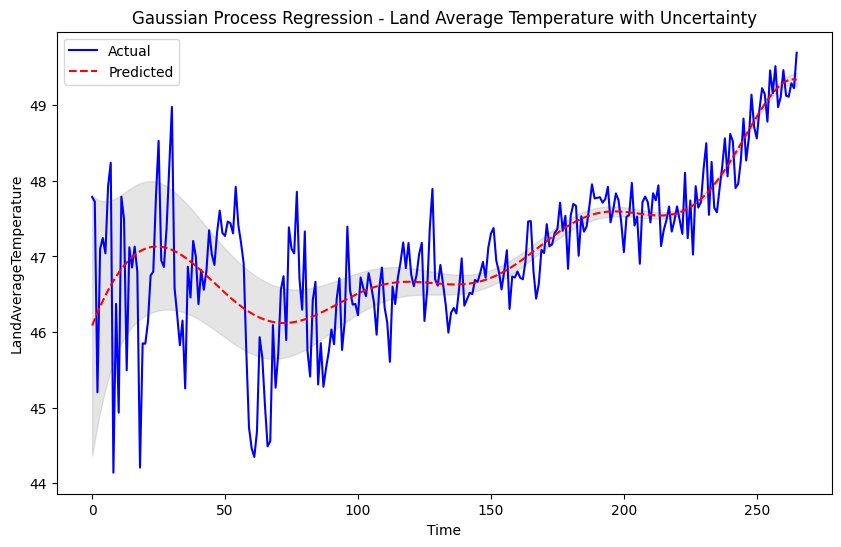

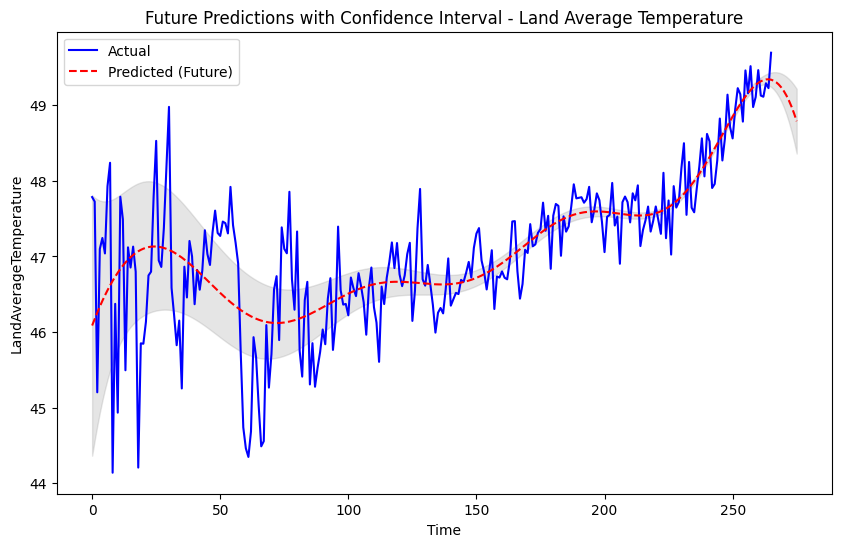

GPR Model MAE for LandAverageTemperature: 0.45467092552956495
GPR Model MSE for LandAverageTemperature: 0.4278429842255235
GPR Model RMSE for LandAverageTemperature: 0.654097075536593


In [29]:
# Prepare the data for Gaussian Process Regression (GPR)
target_column = 'LandAverageTemperature'
uncertainty_column = 'LandAverageTemperatureUncertainty'

# Extract the temperature values and uncertainty values
data_values = cleaned_climate_df[target_column].values
uncertainty_values = cleaned_climate_df[uncertainty_column].values
time_steps = np.arange(len(cleaned_climate_df)).reshape(-1, 1)  # Reshape to a 2D array for GPR

# Define the kernel: RBF kernel with a constant term (product kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Initialize the GaussianProcessRegressor with the kernel and noise level
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=uncertainty_values ** 2)

# Fit the model to the data
gp.fit(time_steps, data_values)

# Make predictions on the training data
predicted_values, sigma = gp.predict(time_steps, return_std=True)

# Calculate the 95% Confidence Interval (CI)
confidence_interval_lower = predicted_values - 1.96 * sigma
confidence_interval_upper = predicted_values + 1.96 * sigma

# Plot the actual vs predicted values with uncertainty bounds (confidence interval)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(time_steps, predicted_values, label='Predicted', color='red', linestyle='--')

# Plot the 95% confidence interval
plt.fill_between(time_steps.flatten(), confidence_interval_lower, confidence_interval_upper, color='gray', alpha=0.2)

plt.title("Gaussian Process Regression - Land Average Temperature with Uncertainty")
plt.xlabel("Time")
plt.ylabel("LandAverageTemperature")
plt.legend()
plt.show()

# Now, we can predict future values for the next 10 years
future_time_steps = np.arange(len(cleaned_climate_df), len(cleaned_climate_df) + 10).reshape(-1, 1)
future_predictions, future_sigma = gp.predict(future_time_steps, return_std=True)

# Calculate the 95% confidence interval for future predictions
future_confidence_interval_lower = future_predictions - 1.96 * future_sigma
future_confidence_interval_upper = future_predictions + 1.96 * future_sigma

# Plot future predictions with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(np.concatenate((time_steps, future_time_steps)),
         np.concatenate((predicted_values, future_predictions)),
         label='Predicted (Future)', color='red', linestyle='--')

# Plot the 95% confidence interval for future predictions
plt.fill_between(np.concatenate((time_steps.flatten(), future_time_steps.flatten())),
                 np.concatenate((confidence_interval_lower, future_confidence_interval_lower)),
                 np.concatenate((confidence_interval_upper, future_confidence_interval_upper)),
                 color='gray', alpha=0.2)

plt.title("Future Predictions with Confidence Interval - Land Average Temperature")
plt.xlabel("Time")
plt.ylabel("LandAverageTemperature")
plt.legend()
plt.show()
# Calculate MAE, MSE, and RMSE for GPR
mae_gpr = mean_absolute_error(data_values, predicted_values)
mse_gpr = mean_squared_error(data_values, predicted_values)
rmse_gpr = math.sqrt(mse_gpr)

# Print the results
print(f'GPR Model MAE for LandAverageTemperature: {mae_gpr}')
print(f'GPR Model MSE for LandAverageTemperature: {mse_gpr}')
print(f'GPR Model RMSE for LandAverageTemperature: {rmse_gpr}')

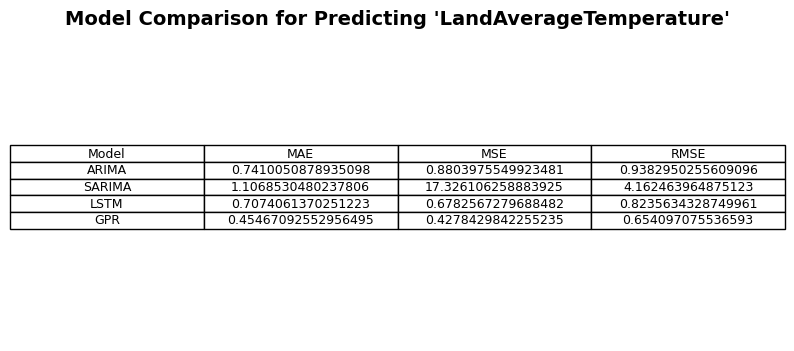

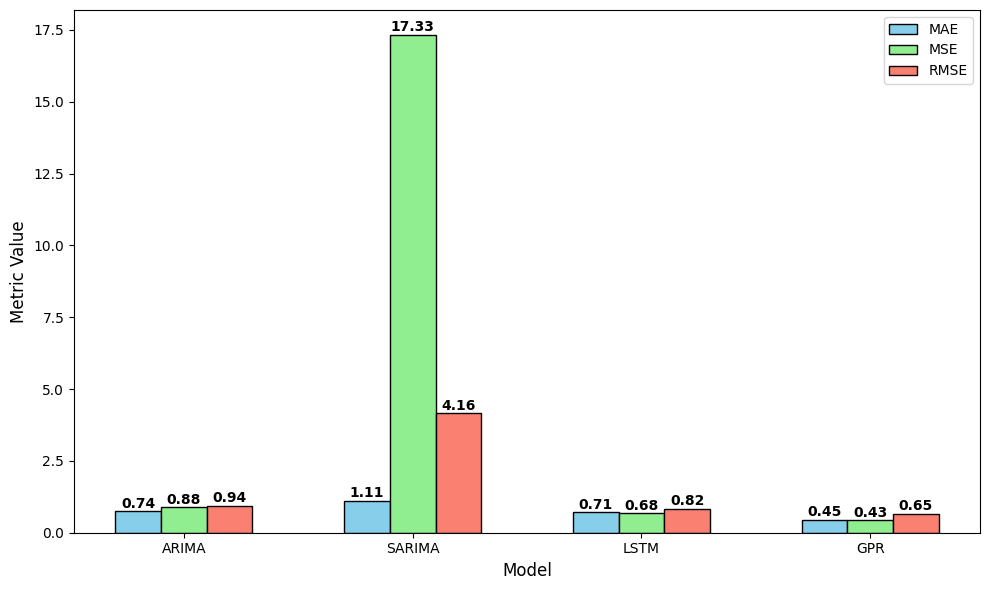

In [30]:
# Define the evaluation metrics for each model (excluding Random Forest)
results = {
    "Model": ["ARIMA", "SARIMA", "LSTM", "GPR"],
    "MAE": [mae_arima, mae_sarima, mae_lstm, mae_gpr],
    "MSE": [mse_arima, mse_sarima, mse_lstm, mse_gpr],
    "RMSE": [rmse_arima, rmse_sarima, rmse_lstm, rmse_gpr]
}

# Create DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Plot the table without any colors (just gridlines)
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

# Adding a title
plt.title("Model Comparison for Predicting 'LandAverageTemperature'", fontsize=14, fontweight='bold')

# Show the table
plt.show()

# Now, plotting the bar chart for comparison of MAE, MSE, and RMSE
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for the comparison
bar_width = 0.2
index = range(len(results_df))

# Positioning for each metric's bar
bar_positions = {
    "MAE": [x - bar_width for x in index],
    "MSE": [x for x in index],
    "RMSE": [x + bar_width for x in index]
}

# Plotting bars for each metric (MAE, MSE, RMSE)
mae_bars = ax.bar(bar_positions["MAE"], results_df["MAE"], width=bar_width, label="MAE", color='skyblue', edgecolor='black')
mse_bars = ax.bar(bar_positions["MSE"], results_df["MSE"], width=bar_width, label="MSE", color='lightgreen', edgecolor='black')
rmse_bars = ax.bar(bar_positions["RMSE"], results_df["RMSE"], width=bar_width, label="RMSE", color='salmon', edgecolor='black')

# Adding the values on top of the bars
for bars, values in zip([mae_bars, mse_bars, rmse_bars], [results_df["MAE"], results_df["MSE"], results_df["RMSE"]]):
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{value:.2f}',  # Adjust 0.02 for spacing
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Setting the x-axis labels (models)
ax.set_xticks(index)
ax.set_xticklabels(results_df["Model"])

# Adding labels and title
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Metric Value', fontsize=12)

# Adding a legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


## Modelling - Predicting "LandMaxTemperature"

## ARIMA

<ipython-input-31-55f3c65d1f81>:6: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)


ARIMA Model MAE for LandMaxTemperature: 0.7662
ARIMA Model MSE for LandMaxTemperature: 0.9416
ARIMA Model RMSE for LandMaxTemperature: 0.9704


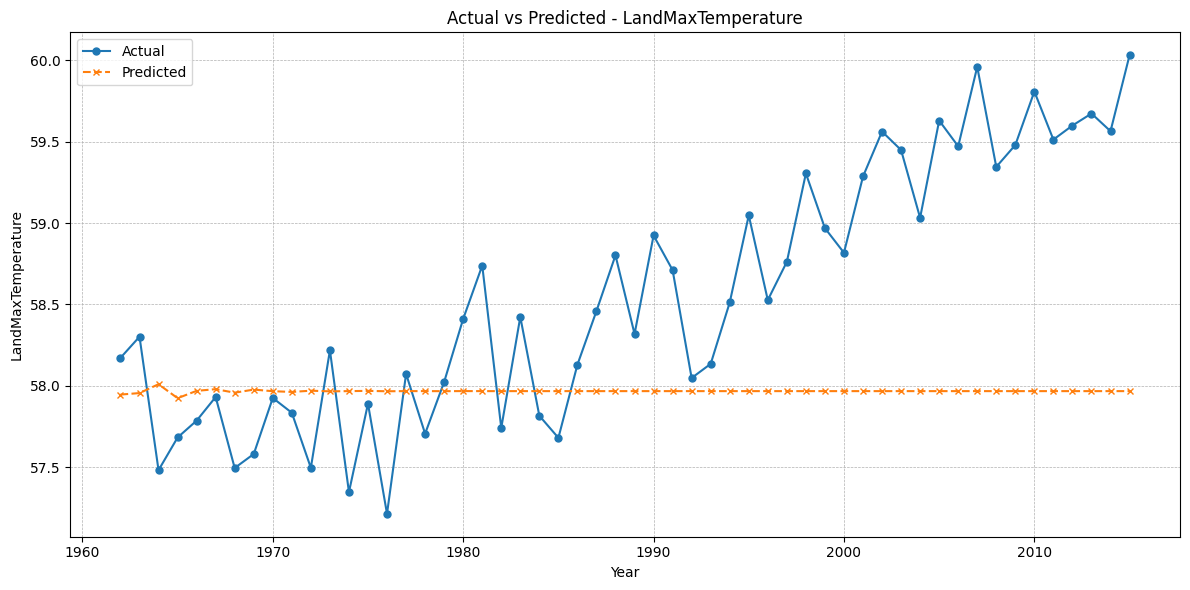

In [31]:
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)

# Convert 'Year' to a DatetimeIndex with annual frequency
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)

# Select the target column for LandMaxTemperature
target_column = 'LandMaxTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data for ARIMA
train_data = train[target_column]
test_data = test[target_column]

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast for test data
forecast = arima_result.forecast(steps=len(test_data))

# Calculate metrics
mae_ar1 = mean_absolute_error(test_data, forecast)
mse_ar1 = mean_squared_error(test_data, forecast)
rmse_ar1 = np.sqrt(mse_ar1)

# Print results
print(f"ARIMA Model MAE for {target_column}: {mae_ar1:.4f}")
print(f"ARIMA Model MSE for {target_column}: {mse_ar1:.4f}")
print(f"ARIMA Model RMSE for {target_column}: {rmse_ar1:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o', linestyle='-', markersize=5)
plt.plot(test_data.index, forecast, label='Predicted', marker='x', linestyle='--', markersize=5)
plt.title(f"Actual vs Predicted - {target_column}")
plt.xlabel("Year")
plt.ylabel(target_column)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## SARIMA

<ipython-input-32-480c89433542>:5: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=623.838, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=536.810, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=596.314, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=525.724, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=499.185, Time=1.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=497.202, Time=0.44 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=499.064, Time=1.54 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=497.019, Time=0.86 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=518.398, Time=0.75 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=486.325, Time=2.86 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=487.876, Time=1.95 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=48

<ipython-input-32-480c89433542>:51: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  future_index = pd.date_range(start=test_data.index[-1],


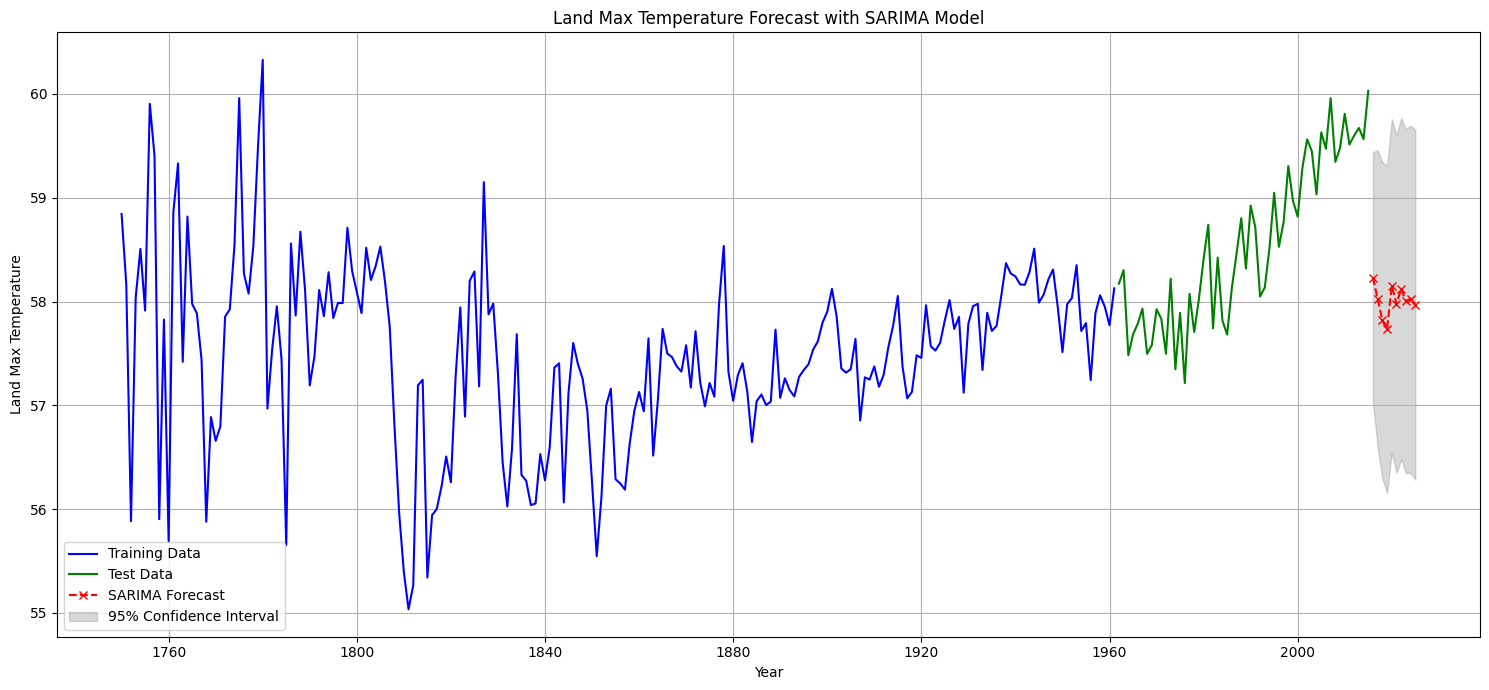


Forecast Results for LandMaxTemperature:
Year: 2016
Predicted Temperature: 58.23°C
95% CI: (57.02, 59.44)
---
Year: 2017
Predicted Temperature: 58.02°C
95% CI: (56.59, 59.46)
---
Year: 2018
Predicted Temperature: 57.82°C
95% CI: (56.29, 59.34)
---
Year: 2019
Predicted Temperature: 57.73°C
95% CI: (56.16, 59.31)
---
Year: 2020
Predicted Temperature: 58.15°C
95% CI: (56.55, 59.76)
---
Year: 2021
Predicted Temperature: 57.98°C
95% CI: (56.35, 59.60)
---
Year: 2022
Predicted Temperature: 58.12°C
95% CI: (56.48, 59.77)
---
Year: 2023
Predicted Temperature: 58.00°C
95% CI: (56.35, 59.66)
---
Year: 2024
Predicted Temperature: 58.02°C
95% CI: (56.35, 59.69)
---
Year: 2025
Predicted Temperature: 57.97°C
95% CI: (56.28, 59.65)
---

Model Performance Metrics for LandMaxTemperature:
RMSE: 5.0000
MAE: 1.2560
MSE: 25.0000


<ipython-input-32-480c89433542>:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")


In [32]:
# Data preparation
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')

# Target column for LandMaxTemperature
target_column = 'LandMaxTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data
train_data = train[target_column]
test_data = test[target_column]

# Find optimal SARIMA parameters using auto_arima
auto_model = auto_arima(train_data,
                       seasonal=True,
                       m=12,  # Annual seasonality
                       start_p=0, start_q=0,
                       max_p=5, max_q=5,
                       start_P=0, start_Q=0,
                       max_P=2, max_Q=2,
                       d=1, D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True)

print("Best SARIMA parameters:", auto_model.order, auto_model.seasonal_order)

# Fit SARIMA model with the best parameters
sarima_model = SARIMAX(train_data,
                      order=(1, 1, 1),           # (p,d,q)
                      seasonal_order=(1, 1, 1, 12), # (P,D,Q,s)
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_results = sarima_model.fit()
print(sarima_results.summary())

# Forecast future values
forecast_steps = 10
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Generate future index for plotting
future_index = pd.date_range(start=test_data.index[-1],
                           periods=forecast_steps + 1,
                           freq='AS-JAN')[1:]

# Plotting
plt.figure(figsize=(15, 7))

# Plot actual historical data
plt.plot(train_data.index, train_data,
         label='Training Data',
         color='blue')

# Plot test data
plt.plot(test_data.index, test_data,
         label='Test Data',
         color='green')

# Plot forecasted data
plt.plot(future_index, forecast_mean,
         label='SARIMA Forecast',
         color='red',
         linestyle='--',
         marker='x')

# Plot confidence intervals
plt.fill_between(future_index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color='gray',
                alpha=0.3,
                label='95% Confidence Interval')

# Customize plot
plt.title('Land Max Temperature Forecast with SARIMA Model')
plt.xlabel('Year')
plt.ylabel('Land Max Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecast results
print("\nForecast Results for LandMaxTemperature:")
for i in range(len(forecast_mean)):
    print(f"Year: {future_index[i].year}")
    print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")
    print(f"95% CI: ({conf_int.iloc[i, 0]:.2f}, {conf_int.iloc[i, 1]:.2f})")
    print("---")

# Calculate error metrics for training period
train_pred = sarima_results.get_prediction(start=train_data.index[0])
train_mean = train_pred.predicted_mean

# Calculate RMSE, MAE, and MSE
rmse_sar1 = math.sqrt(mean_squared_error(train_data, train_mean))
mae_sar1 = mean_absolute_error(train_data, train_mean)
mse_sar1 = mean_squared_error(train_data, train_mean)

print("\nModel Performance Metrics for LandMaxTemperature:")
print(f"RMSE: {rmse_sar1:.4f}")
print(f"MAE: {mae_sar1:.4f}")
print(f"MSE: {mse_sar1:.4f}")


## LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1617
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0311
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0291
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0219
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0241
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0238
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0232
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0212
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0205
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0215
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0258
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0211
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0236
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0193
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━

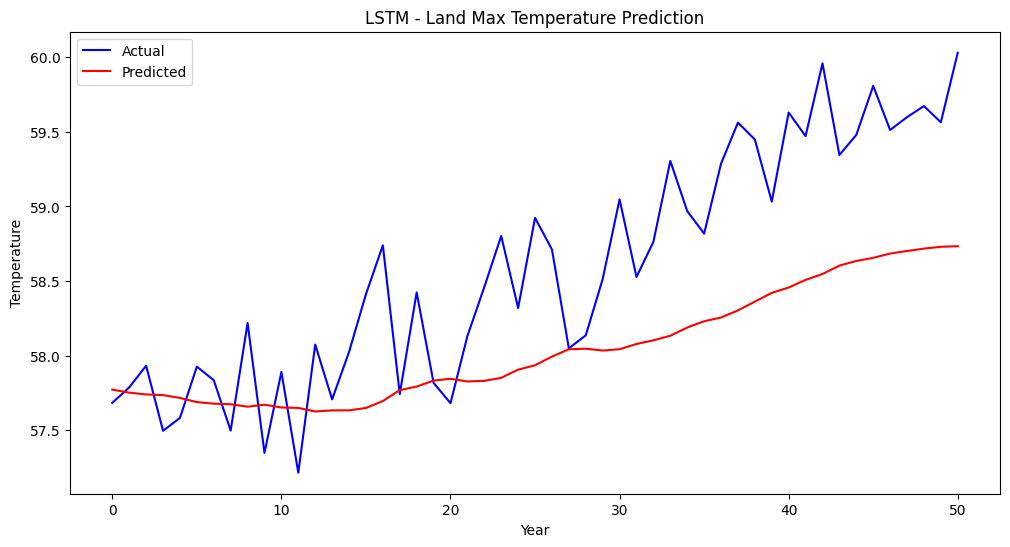

LSTM Model MAE for LandMaxTemperature: 0.6020820843864881
LSTM Model MSE for LandMaxTemperature: 0.5199443515750325
LSTM Model RMSE for LandMaxTemperature: 0.7210716688201197


In [33]:
temp_column = 'LandMaxTemperature'

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_max = scaler.fit_transform(cleaned_climate_df[[temp_column]].values)

# Create a dataset with a lookback window of 12 months (1 year)
lookback = 12

def create_dataset(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_max, y_max = create_dataset(scaled_data_max, lookback)

# Reshaping input data to be 3D for LSTM [samples, time steps, features]
X_max = X_max.reshape(X_max.shape[0], X_max.shape[1], 1)

# Split the data into training and test sets
train_size_max = int(len(X_max) * 0.8)
X_train_max, X_test_max = X_max[:train_size_max], X_max[train_size_max:]
y_train_max, y_test_max = y_max[:train_size_max], y_max[train_size_max:]

# Build the LSTM model for LandMaxTemperature
model_max = Sequential()
model_max.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_max.shape[1], 1)))
model_max.add(Dropout(0.2))
model_max.add(LSTM(units=50, return_sequences=False))
model_max.add(Dropout(0.2))
model_max.add(Dense(units=1))

model_max.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_max.fit(X_train_max, y_train_max, epochs=20, batch_size=32)

# Make predictions
predictions_max = model_max.predict(X_test_max)
predictions_max = scaler.inverse_transform(predictions_max)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_max)), scaler.inverse_transform(y_test_max.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(range(len(predictions_max)), predictions_max, color='red', label='Predicted')
plt.title('LSTM - Land Max Temperature Prediction')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Evaluate performance
mae_lstm1 = mean_absolute_error(scaler.inverse_transform(y_test_max.reshape(-1, 1)), predictions_max)
mse_lstm1 = mean_squared_error(scaler.inverse_transform(y_test_max.reshape(-1, 1)), predictions_max)
rmse_lstm1 = np.sqrt(mse_lstm1)

print(f'LSTM Model MAE for LandMaxTemperature: {mae_lstm1}')
print(f'LSTM Model MSE for LandMaxTemperature: {mse_lstm1}')
print(f'LSTM Model RMSE for LandMaxTemperature: {rmse_lstm1}')


## Gaussian Process Regression (GPR) for Time Series

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


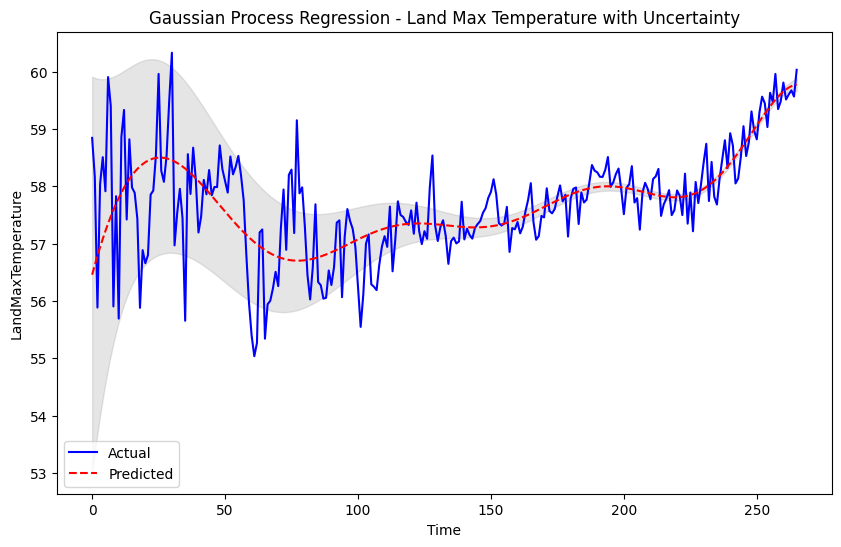

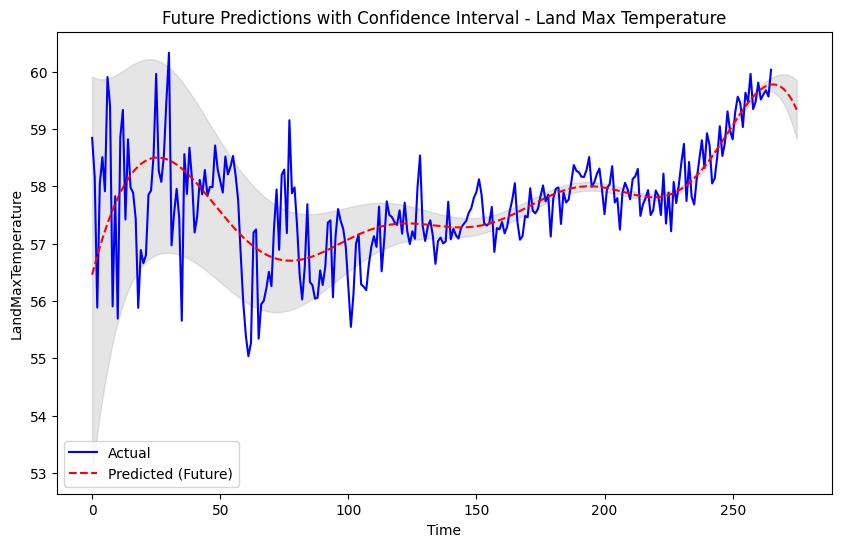

GPR Model MAE for LandMaxTemperature: 0.4962
GPR Model MSE for LandMaxTemperature: 0.5167
GPR Model RMSE for LandMaxTemperature: 0.7188


In [34]:
# Prepare the data for Gaussian Process Regression (GPR)
target_column = 'LandMaxTemperature'
uncertainty_column = 'LandMaxTemperatureUncertainty'

# Extract the temperature values and uncertainty values
data_values = cleaned_climate_df[target_column].values
uncertainty_values = cleaned_climate_df[uncertainty_column].values
time_steps = np.arange(len(cleaned_climate_df)).reshape(-1, 1)  # Reshape to a 2D array for GPR

# Define the kernel: RBF kernel with a constant term (product kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Initialize the GaussianProcessRegressor with the kernel and noise level
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=uncertainty_values ** 2)

# Fit the model to the data
gp.fit(time_steps, data_values)

# Make predictions on the training data
predicted_values, sigma = gp.predict(time_steps, return_std=True)

# Calculate the 95% Confidence Interval (CI)
confidence_interval_lower = predicted_values - 1.96 * sigma
confidence_interval_upper = predicted_values + 1.96 * sigma

# Plot the actual vs predicted values with uncertainty bounds (confidence interval)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(time_steps, predicted_values, label='Predicted', color='red', linestyle='--')

# Plot the 95% confidence interval
plt.fill_between(time_steps.flatten(), confidence_interval_lower, confidence_interval_upper, color='gray', alpha=0.2)

plt.title("Gaussian Process Regression - Land Max Temperature with Uncertainty")
plt.xlabel("Time")
plt.ylabel("LandMaxTemperature")
plt.legend()
plt.show()

# Predict future values for the next 10 years
future_time_steps = np.arange(len(cleaned_climate_df), len(cleaned_climate_df) + 10).reshape(-1, 1)
future_predictions, future_sigma = gp.predict(future_time_steps, return_std=True)

# Calculate the 95% confidence interval for future predictions
future_confidence_interval_lower = future_predictions - 1.96 * future_sigma
future_confidence_interval_upper = future_predictions + 1.96 * future_sigma

# Plot future predictions with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(np.concatenate((time_steps, future_time_steps)),
         np.concatenate((predicted_values, future_predictions)),
         label='Predicted (Future)', color='red', linestyle='--')

# Plot the 95% confidence interval for future predictions
plt.fill_between(np.concatenate((time_steps.flatten(), future_time_steps.flatten())),
                 np.concatenate((confidence_interval_lower, future_confidence_interval_lower)),
                 np.concatenate((confidence_interval_upper, future_confidence_interval_upper)),
                 color='gray', alpha=0.2)

plt.title("Future Predictions with Confidence Interval - Land Max Temperature")
plt.xlabel("Time")
plt.ylabel("LandMaxTemperature")
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE for the GPR model on the training data
mae_gpr1 = mean_absolute_error(data_values, predicted_values)
mse_gpr1 = mean_squared_error(data_values, predicted_values)
rmse_gpr1 = math.sqrt(mse_gpr1)

# Print the results
print(f'GPR Model MAE for LandMaxTemperature: {mae_gpr1:.4f}')
print(f'GPR Model MSE for LandMaxTemperature: {mse_gpr1:.4f}')
print(f'GPR Model RMSE for LandMaxTemperature: {rmse_gpr1:.4f}')


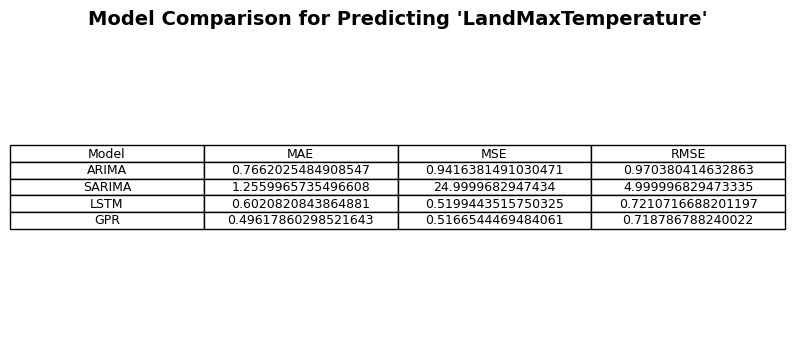

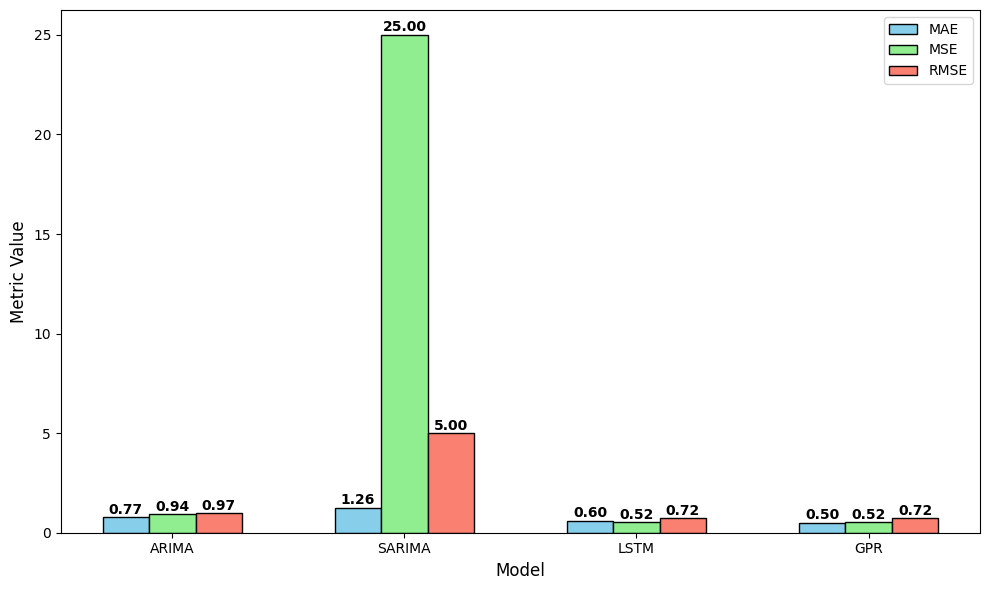

In [35]:
# Define the evaluation metrics for each model (excluding Random Forest)
results = {
    "Model": ["ARIMA", "SARIMA", "LSTM", "GPR"],
    "MAE": [mae_ar1, mae_sar1, mae_lstm1, mae_gpr1],
    "MSE": [mse_ar1, mse_sar1, mse_lstm1, mse_gpr1],
    "RMSE": [rmse_ar1, rmse_sar1, rmse_lstm1, rmse_gpr1]
}

# Create DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Plot the table without any colors (just gridlines)
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

# Adding a title
plt.title("Model Comparison for Predicting 'LandMaxTemperature'", fontsize=14, fontweight='bold')

# Show the table
plt.show()

# Now, plotting the bar chart for comparison of MAE, MSE, and RMSE
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for the comparison
bar_width = 0.2
index = range(len(results_df))

# Positioning for each metric's bar
bar_positions = {
    "MAE": [x - bar_width for x in index],
    "MSE": [x for x in index],
    "RMSE": [x + bar_width for x in index]
}

# Plotting bars for each metric (MAE, MSE, RMSE)
mae_bars = ax.bar(bar_positions["MAE"], results_df["MAE"], width=bar_width, label="MAE", color='skyblue', edgecolor='black')
mse_bars = ax.bar(bar_positions["MSE"], results_df["MSE"], width=bar_width, label="MSE", color='lightgreen', edgecolor='black')
rmse_bars = ax.bar(bar_positions["RMSE"], results_df["RMSE"], width=bar_width, label="RMSE", color='salmon', edgecolor='black')

# Adding the values on top of the bars
for bars, values in zip([mae_bars, mse_bars, rmse_bars], [results_df["MAE"], results_df["MSE"], results_df["RMSE"]]):
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{value:.2f}',  # Adjust 0.02 for spacing
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Setting the x-axis labels (models)
ax.set_xticks(index)
ax.set_xticklabels(results_df["Model"])

# Adding labels and title
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Metric Value', fontsize=12)

# Adding a legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


## Modelling - Predicting "LandMinTemperature"

## ARIMA

<ipython-input-36-806ffb9bf9fc>:6: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)


ARIMA Model MAE for LandMinTemperature: 0.7647
ARIMA Model MSE for LandMinTemperature: 0.8546
ARIMA Model RMSE for LandMinTemperature: 0.9245


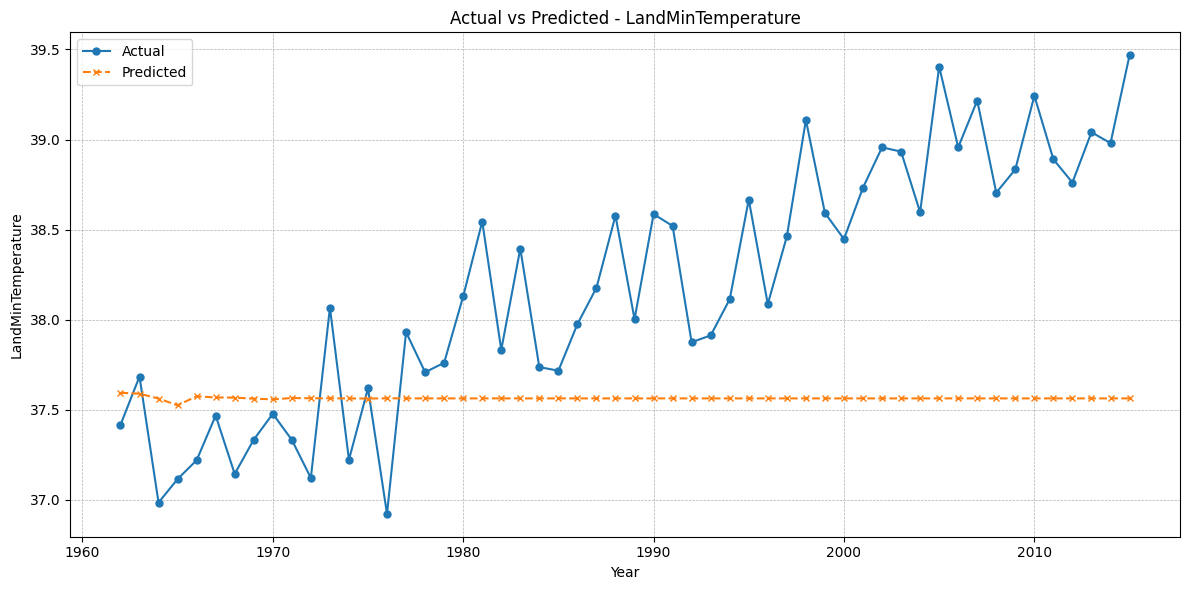

In [36]:
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)

# Convert 'Year' to a DatetimeIndex with annual frequency
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)

# Select the target column for LandMinTemperature
target_column = 'LandMinTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data for ARIMA
train_data = train[target_column]
test_data = test[target_column]

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast for test data
forecast = arima_result.forecast(steps=len(test_data))

# Calculate metrics
mae_ar2 = mean_absolute_error(test_data, forecast)
mse_ar2 = mean_squared_error(test_data, forecast)
rmse_ar2 = np.sqrt(mse_ar2)

# Print results
print(f"ARIMA Model MAE for {target_column}: {mae_ar2:.4f}")
print(f"ARIMA Model MSE for {target_column}: {mse_ar2:.4f}")
print(f"ARIMA Model RMSE for {target_column}: {rmse_ar2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o', linestyle='-', markersize=5)
plt.plot(test_data.index, forecast, label='Predicted', marker='x', linestyle='--', markersize=5)
plt.title(f"Actual vs Predicted - {target_column}")
plt.xlabel("Year")
plt.ylabel(target_column)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## SARIMA

<ipython-input-37-6c9fab6b4448>:4: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=614.602, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=533.323, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=597.657, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=526.939, Time=0.37 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=549.750, Time=0.27 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=519.319, Time=0.52 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=526.718, Time=0.21 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.01 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=513.008, Time=0.58 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=521.575, Time=0.24 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=

<ipython-input-37-6c9fab6b4448>:50: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  future_index = pd.date_range(start=test_data.index[-1],


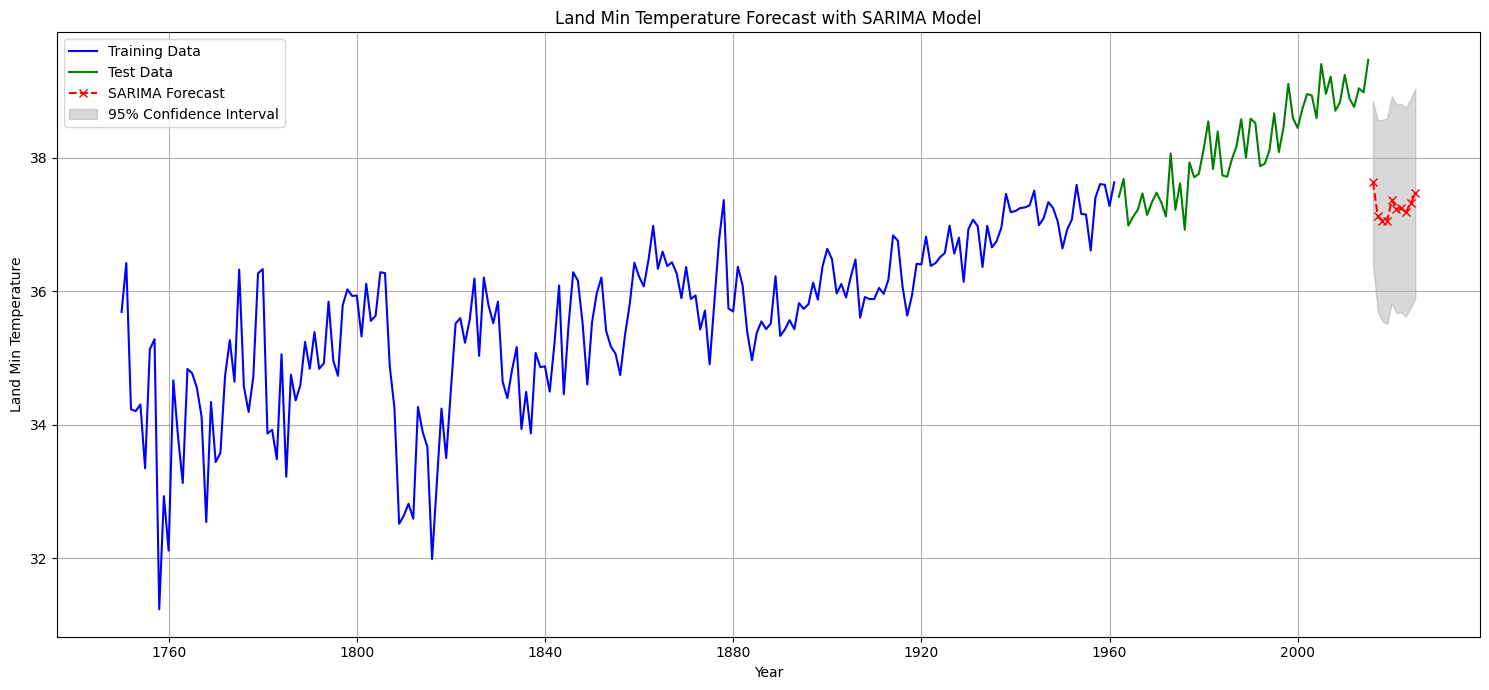


Forecast Results for LandMinTemperature:
Year: 2016
Predicted Temperature: 37.63°C
95% CI: (36.42, 38.85)
---
Year: 2017
Predicted Temperature: 37.13°C
95% CI: (35.70, 38.56)
---
Year: 2018
Predicted Temperature: 37.06°C
95% CI: (35.55, 38.57)
---
Year: 2019
Predicted Temperature: 37.05°C
95% CI: (35.51, 38.59)
---
Year: 2020
Predicted Temperature: 37.37°C
95% CI: (35.82, 38.92)
---
Year: 2021
Predicted Temperature: 37.24°C
95% CI: (35.68, 38.79)
---
Year: 2022
Predicted Temperature: 37.24°C
95% CI: (35.68, 38.81)
---
Year: 2023
Predicted Temperature: 37.19°C
95% CI: (35.62, 38.75)
---
Year: 2024
Predicted Temperature: 37.32°C
95% CI: (35.75, 38.88)
---
Year: 2025
Predicted Temperature: 37.47°C
95% CI: (35.90, 39.03)
---

Model Performance Metrics for LandMinTemperature:
RMSE: 3.2036
MAE: 1.0348
MSE: 10.2634


<ipython-input-37-6c9fab6b4448>:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")


In [37]:
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')

# Target column for LandMinTemperature
target_column = 'LandMinTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data
train_data = train[target_column]
test_data = test[target_column]

# Find optimal SARIMA parameters using auto_arima
auto_model = auto_arima(train_data,
                       seasonal=True,
                       m=12,  # Annual seasonality
                       start_p=0, start_q=0,
                       max_p=5, max_q=5,
                       start_P=0, start_Q=0,
                       max_P=2, max_Q=2,
                       d=1, D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True)

print("Best SARIMA parameters:", auto_model.order, auto_model.seasonal_order)

# Fit SARIMA model with the best parameters
sarima_model = SARIMAX(train_data,
                      order=(1, 1, 1),           # (p,d,q)
                      seasonal_order=(1, 1, 1, 12), # (P,D,Q,s)
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_results = sarima_model.fit()
print(sarima_results.summary())

# Forecast future values
forecast_steps = 10
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Generate future index for plotting
future_index = pd.date_range(start=test_data.index[-1],
                           periods=forecast_steps + 1,
                           freq='AS-JAN')[1:]

# Plotting
plt.figure(figsize=(15, 7))

# Plot actual historical data
plt.plot(train_data.index, train_data,
         label='Training Data',
         color='blue')

# Plot test data
plt.plot(test_data.index, test_data,
         label='Test Data',
         color='green')

# Plot forecasted data
plt.plot(future_index, forecast_mean,
         label='SARIMA Forecast',
         color='red',
         linestyle='--',
         marker='x')

# Plot confidence intervals
plt.fill_between(future_index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color='gray',
                alpha=0.3,
                label='95% Confidence Interval')

# Customize plot
plt.title('Land Min Temperature Forecast with SARIMA Model')
plt.xlabel('Year')
plt.ylabel('Land Min Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecast results
print("\nForecast Results for LandMinTemperature:")
for i in range(len(forecast_mean)):
    print(f"Year: {future_index[i].year}")
    print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")
    print(f"95% CI: ({conf_int.iloc[i, 0]:.2f}, {conf_int.iloc[i, 1]:.2f})")
    print("---")

# Calculate error metrics for training period
train_pred = sarima_results.get_prediction(start=train_data.index[0])
train_mean = train_pred.predicted_mean

# Calculate RMSE, MAE, and MSE
rmse_sar2 = math.sqrt(mean_squared_error(train_data, train_mean))
mae_sar2 = mean_absolute_error(train_data, train_mean)
mse_sar2 = mean_squared_error(train_data, train_mean)

print("\nModel Performance Metrics for LandMinTemperature:")
print(f"RMSE: {rmse_sar2:.4f}")
print(f"MAE: {mae_sar2:.4f}")
print(f"MSE: {mse_sar2:.4f}")



## LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2335
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0259
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0289
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0173
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0163
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0147
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0148
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0136
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0138
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0139
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0137
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0152
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0137
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0143
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step


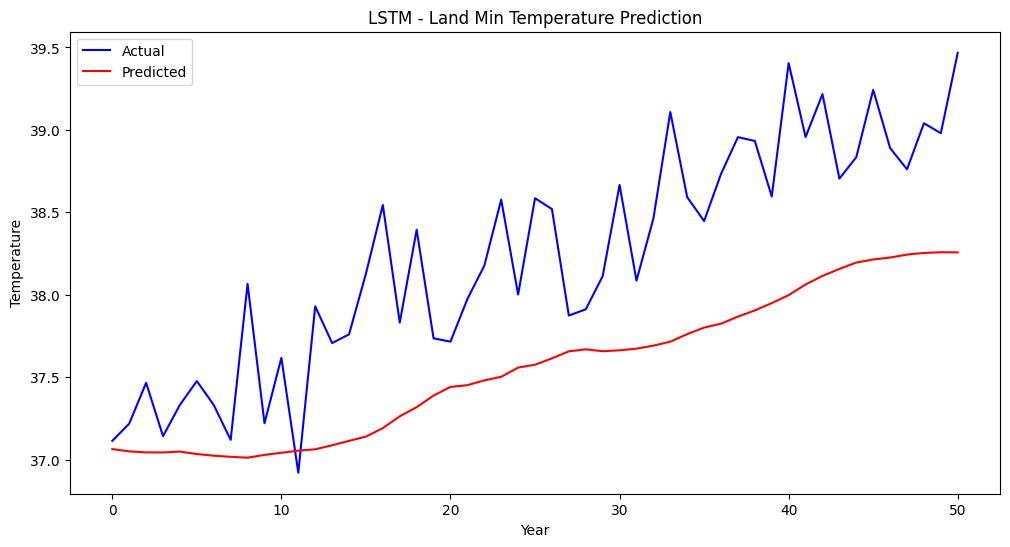

LSTM Model MAE for LandMinTemperature: 0.6739453046013327
LSTM Model MSE for LandMinTemperature: 0.5833846411308247
LSTM Model RMSE for LandMinTemperature: 0.7637962039253826


In [38]:
temp_column_min = 'LandMinTemperature'

# Scaling the data
scaler_min = MinMaxScaler(feature_range=(0, 1))
scaled_data_min = scaler_min.fit_transform(cleaned_climate_df[[temp_column_min]].values)

# Create a dataset with a lookback window of 12 months (1 year)
lookback = 12

def create_dataset(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_min, y_min = create_dataset(scaled_data_min, lookback)

# Reshaping input data to be 3D for LSTM [samples, time steps, features]
X_min = X_min.reshape(X_min.shape[0], X_min.shape[1], 1)

# Split the data into training and test sets
train_size_min = int(len(X_min) * 0.8)
X_train_min, X_test_min = X_min[:train_size_min], X_min[train_size_min:]
y_train_min, y_test_min = y_min[:train_size_min], y_min[train_size_min:]

# Build the LSTM model for LandMinTemperature
model_min = Sequential()
model_min.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_min.shape[1], 1)))
model_min.add(Dropout(0.2))
model_min.add(LSTM(units=50, return_sequences=False))
model_min.add(Dropout(0.2))
model_min.add(Dense(units=1))

model_min.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_min.fit(X_train_min, y_train_min, epochs=20, batch_size=32)

# Make predictions
predictions_min = model_min.predict(X_test_min)
predictions_min = scaler_min.inverse_transform(predictions_min)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_min)), scaler_min.inverse_transform(y_test_min.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(range(len(predictions_min)), predictions_min, color='red', label='Predicted')
plt.title('LSTM - Land Min Temperature Prediction')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Evaluate performance
mae_lstm2 = mean_absolute_error(scaler_min.inverse_transform(y_test_min.reshape(-1, 1)), predictions_min)
mse_lstm2 = mean_squared_error(scaler_min.inverse_transform(y_test_min.reshape(-1, 1)), predictions_min)
rmse_lstm2 = np.sqrt(mse_lstm2)

print(f'LSTM Model MAE for LandMinTemperature: {mae_lstm2}')
print(f'LSTM Model MSE for LandMinTemperature: {mse_lstm2}')
print(f'LSTM Model RMSE for LandMinTemperature: {rmse_lstm2}')


## Gaussian Process Regression (GPR) for Time Series

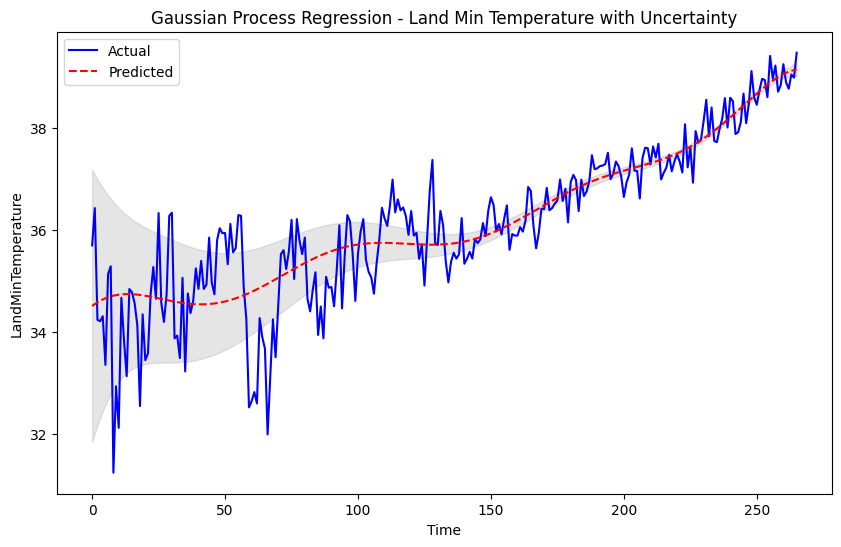

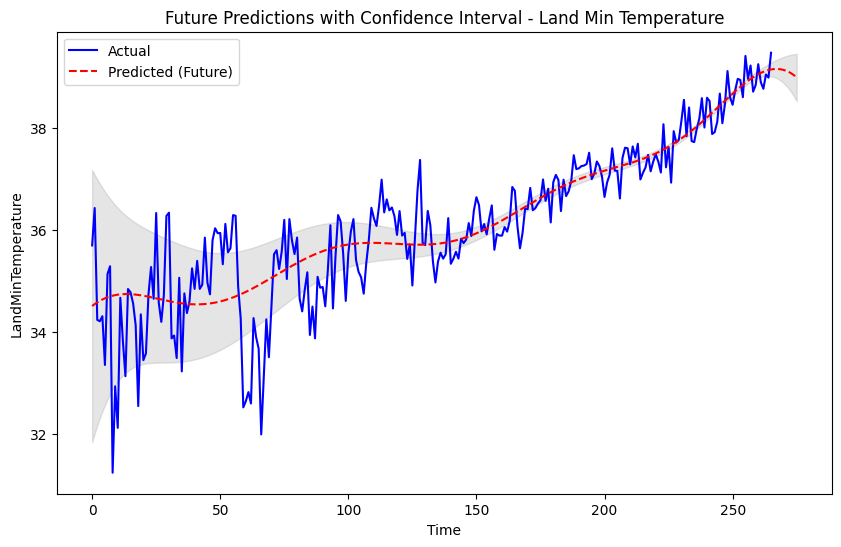

GPR Model MAE for LandMinTemperature: 0.5295
GPR Model MSE for LandMinTemperature: 0.5845
GPR Model RMSE for LandMinTemperature: 0.7645


In [39]:
target_column = 'LandMinTemperature'
uncertainty_column = 'LandMinTemperatureUncertainty'

# Extract the temperature values and uncertainty values
data_values = cleaned_climate_df[target_column].values
uncertainty_values = cleaned_climate_df[uncertainty_column].values
time_steps = np.arange(len(cleaned_climate_df)).reshape(-1, 1)  # Reshape to a 2D array for GPR

# Define the kernel: RBF kernel with a constant term (product kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Initialize the GaussianProcessRegressor with the kernel and noise level
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=uncertainty_values ** 2)

# Fit the model to the data
gp.fit(time_steps, data_values)

# Make predictions on the training data
predicted_values, sigma = gp.predict(time_steps, return_std=True)

# Calculate the 95% Confidence Interval (CI)
confidence_interval_lower = predicted_values - 1.96 * sigma
confidence_interval_upper = predicted_values + 1.96 * sigma

# Plot the actual vs predicted values with uncertainty bounds (confidence interval)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(time_steps, predicted_values, label='Predicted', color='red', linestyle='--')

# Plot the 95% confidence interval
plt.fill_between(time_steps.flatten(), confidence_interval_lower, confidence_interval_upper, color='gray', alpha=0.2)

plt.title("Gaussian Process Regression - Land Min Temperature with Uncertainty")
plt.xlabel("Time")
plt.ylabel("LandMinTemperature")
plt.legend()
plt.show()

# Predict future values for the next 10 years
future_time_steps = np.arange(len(cleaned_climate_df), len(cleaned_climate_df) + 10).reshape(-1, 1)
future_predictions, future_sigma = gp.predict(future_time_steps, return_std=True)

# Calculate the 95% confidence interval for future predictions
future_confidence_interval_lower = future_predictions - 1.96 * future_sigma
future_confidence_interval_upper = future_predictions + 1.96 * future_sigma

# Plot future predictions with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(np.concatenate((time_steps, future_time_steps)),
         np.concatenate((predicted_values, future_predictions)),
         label='Predicted (Future)', color='red', linestyle='--')

# Plot the 95% confidence interval for future predictions
plt.fill_between(np.concatenate((time_steps.flatten(), future_time_steps.flatten())),
                 np.concatenate((confidence_interval_lower, future_confidence_interval_lower)),
                 np.concatenate((confidence_interval_upper, future_confidence_interval_upper)),
                 color='gray', alpha=0.2)

plt.title("Future Predictions with Confidence Interval - Land Min Temperature")
plt.xlabel("Time")
plt.ylabel("LandMinTemperature")
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE for the predictions
mae_gpr2 = mean_absolute_error(data_values, predicted_values)
mse_gpr2 = mean_squared_error(data_values, predicted_values)
rmse_gpr2 = math.sqrt(mse_gpr2)

# Print the results
print(f'GPR Model MAE for LandMinTemperature: {mae_gpr2:.4f}')
print(f'GPR Model MSE for LandMinTemperature: {mse_gpr2:.4f}')
print(f'GPR Model RMSE for LandMinTemperature: {rmse_gpr2:.4f}')


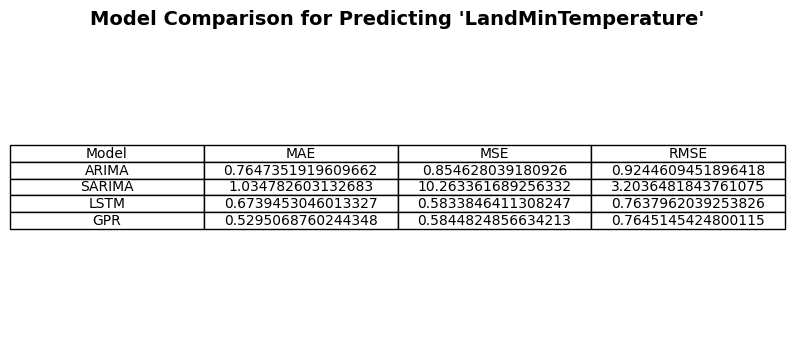

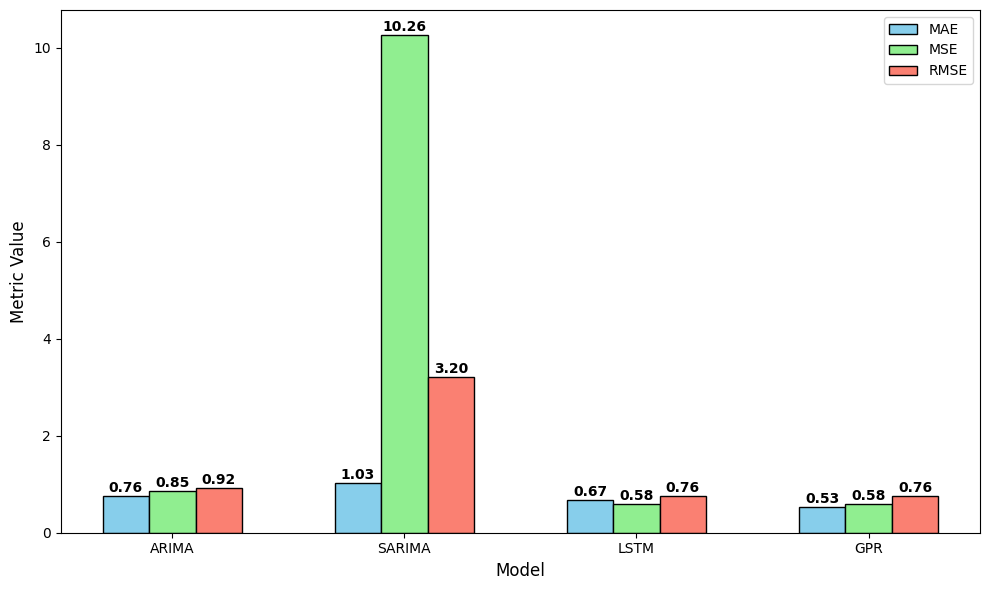

In [40]:
# Define the evaluation metrics for each model (excluding Random Forest)
results = {
    "Model": ["ARIMA", "SARIMA", "LSTM", "GPR"],
    "MAE": [mae_ar2, mae_sar2, mae_lstm2, mae_gpr2],
    "MSE": [mse_ar2, mse_sar2, mse_lstm2, mse_gpr2],
    "RMSE": [rmse_ar2, rmse_sar2, rmse_lstm2, rmse_gpr2]
}

# Create DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Plot the table without any colors (just gridlines)
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

# Adding a title
plt.title("Model Comparison for Predicting 'LandMinTemperature'", fontsize=14, fontweight='bold')

# Show the table
plt.show()

# Now, plotting the bar chart for comparison of MAE, MSE, and RMSE
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for the comparison
bar_width = 0.2
index = range(len(results_df))

# Positioning for each metric's bar
bar_positions = {
    "MAE": [x - bar_width for x in index],
    "MSE": [x for x in index],
    "RMSE": [x + bar_width for x in index]
}

# Plotting bars for each metric (MAE, MSE, RMSE)
mae_bars = ax.bar(bar_positions["MAE"], results_df["MAE"], width=bar_width, label="MAE", color='skyblue', edgecolor='black')
mse_bars = ax.bar(bar_positions["MSE"], results_df["MSE"], width=bar_width, label="MSE", color='lightgreen', edgecolor='black')
rmse_bars = ax.bar(bar_positions["RMSE"], results_df["RMSE"], width=bar_width, label="RMSE", color='salmon', edgecolor='black')

# Adding the values on top of the bars
for bars, values in zip([mae_bars, mse_bars, rmse_bars], [results_df["MAE"], results_df["MSE"], results_df["RMSE"]]):
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{value:.2f}',  # Adjust 0.02 for spacing
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Setting the x-axis labels (models)
ax.set_xticks(index)
ax.set_xticklabels(results_df["Model"])

# Adding labels and title
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Metric Value', fontsize=12)

# Adding a legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


## Modelling - Predicting  "LandAndOceanAverageTemperature"

## ARIMA

<ipython-input-41-6c25bdd08069>:6: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)


ARIMA Model MAE for LandAndOceanAverageTemperature: 0.4096
ARIMA Model MSE for LandAndOceanAverageTemperature: 0.2677
ARIMA Model RMSE for LandAndOceanAverageTemperature: 0.5174


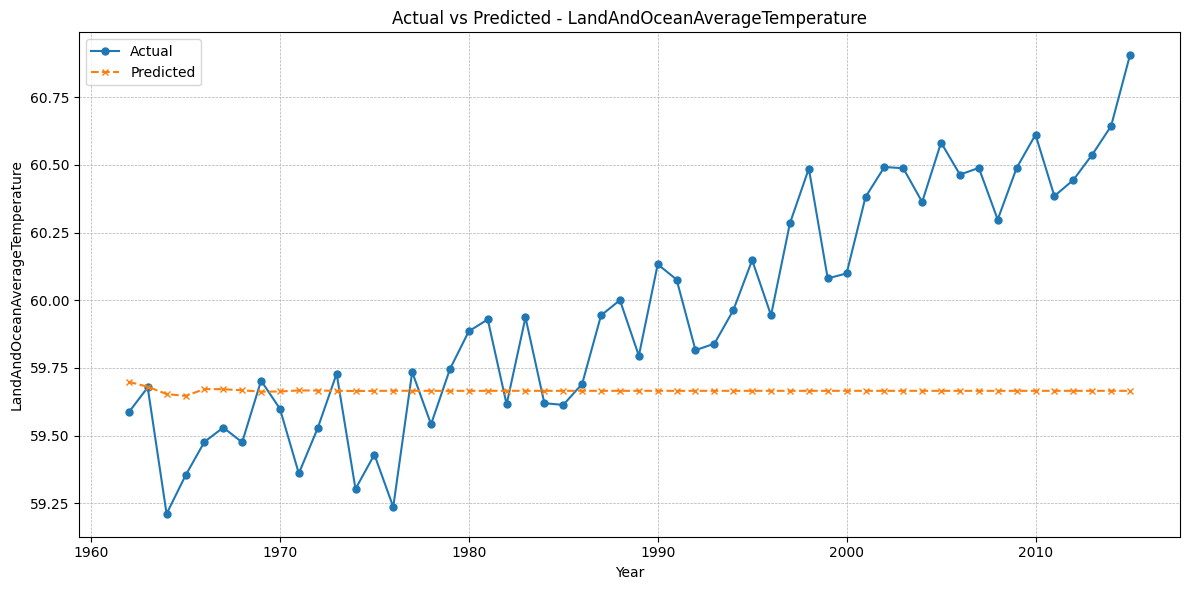

In [41]:
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)

# Convert 'Year' to a DatetimeIndex with annual frequency
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')  # Set to annual start (January)

# Select the target column for LandAndOceanAverageTemperature
target_column = 'LandAndOceanAverageTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data for ARIMA
train_data = train[target_column]
test_data = test[target_column]

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast for test data
forecast = arima_result.forecast(steps=len(test_data))

# Calculate metrics
mae_ar3 = mean_absolute_error(test_data, forecast)
mse_ar3 = mean_squared_error(test_data, forecast)
rmse_ar3 = np.sqrt(mse_ar3)

# Print results
print(f"ARIMA Model MAE for {target_column}: {mae_ar3:.4f}")
print(f"ARIMA Model MSE for {target_column}: {mse_ar3:.4f}")
print(f"ARIMA Model RMSE for {target_column}: {rmse_ar3:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o', linestyle='-', markersize=5)
plt.plot(test_data.index, forecast, label='Predicted', marker='x', linestyle='--', markersize=5)
plt.title(f"Actual vs Predicted - {target_column}")
plt.xlabel("Year")
plt.ylabel(target_column)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## SARIMA

<ipython-input-42-647ebc626bc3>:4: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=205.012, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=145.874, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=194.039, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=142.378, Time=1.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=158.919, Time=0.49 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=137.864, Time=0.79 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=141.792, Time=0.34 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.76 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=132.072, Time=2.99 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=135.387, Time=0.50 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=

<ipython-input-42-647ebc626bc3>:50: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  future_index = pd.date_range(start=test_data.index[-1],


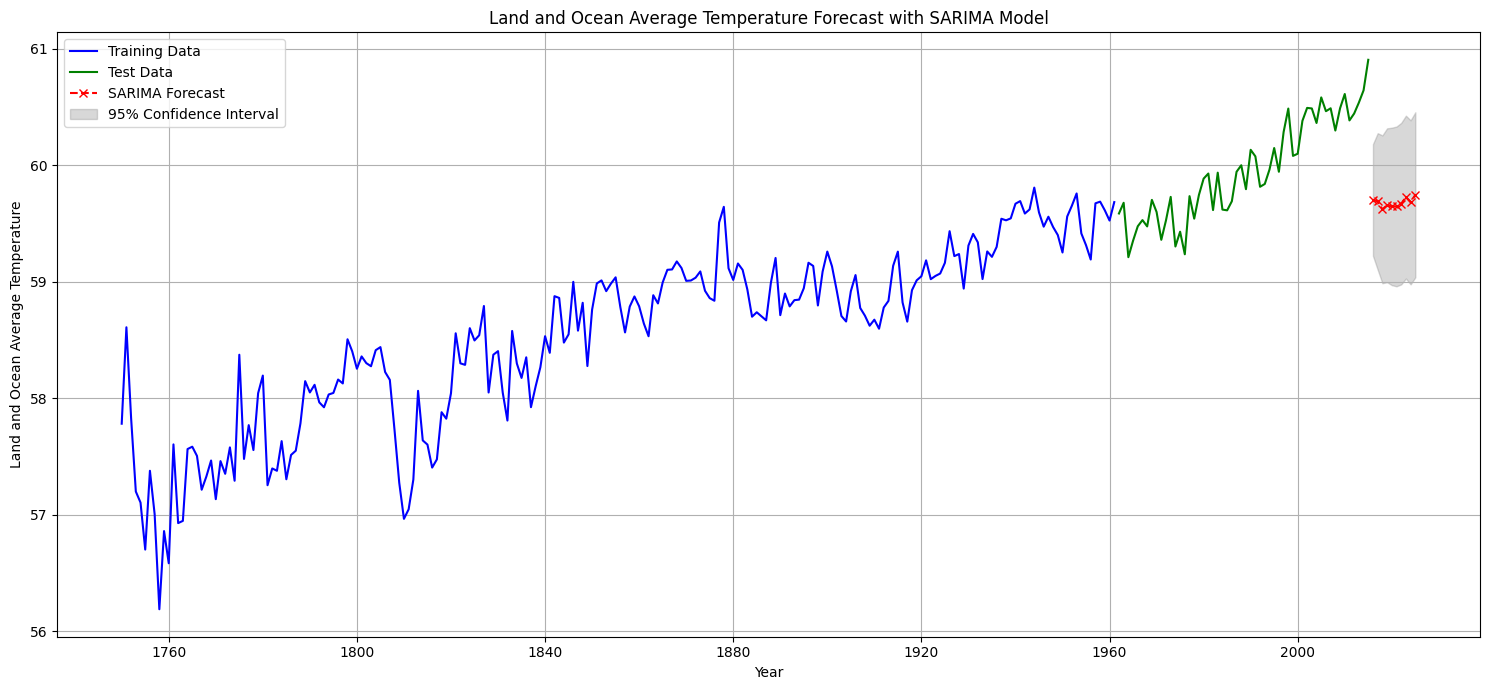


Forecast Results for LandAndOceanAverageTemperature:
Year: 2016
Predicted Temperature: 59.70°C
95% CI: (59.22, 60.18)
---
Year: 2017
Predicted Temperature: 59.69°C
95% CI: (59.10, 60.28)
---
Year: 2018
Predicted Temperature: 59.62°C
95% CI: (58.99, 60.26)
---
Year: 2019
Predicted Temperature: 59.66°C
95% CI: (59.00, 60.32)
---
Year: 2020
Predicted Temperature: 59.65°C
95% CI: (58.97, 60.32)
---
Year: 2021
Predicted Temperature: 59.65°C
95% CI: (58.96, 60.33)
---
Year: 2022
Predicted Temperature: 59.67°C
95% CI: (58.98, 60.36)
---
Year: 2023
Predicted Temperature: 59.73°C
95% CI: (59.03, 60.43)
---
Year: 2024
Predicted Temperature: 59.68°C
95% CI: (58.98, 60.39)
---
Year: 2025
Predicted Temperature: 59.75°C
95% CI: (59.04, 60.45)
---

Model Performance Metrics for LandAndOceanAverageTemperature:
RMSE: 5.0116
MAE: 0.8701
MSE: 25.1163


<ipython-input-42-647ebc626bc3>:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")


In [42]:
cleaned_climate_df = cleaned_climate_df.groupby('Year').mean()
cleaned_climate_df.sort_index(inplace=True)
cleaned_climate_df.index = pd.to_datetime(cleaned_climate_df.index, format='%Y')
cleaned_climate_df = cleaned_climate_df.asfreq('AS-JAN')

# Target column for LandAndOceanAverageTemperature
target_column = 'LandAndOceanAverageTemperature'

# Train-Test Split
train_size = int(len(cleaned_climate_df) * 0.8)
train = cleaned_climate_df[:train_size]
test = cleaned_climate_df[train_size:]

# Prepare data
train_data = train[target_column]
test_data = test[target_column]

# Find optimal SARIMA parameters using auto_arima
auto_model = auto_arima(train_data,
                       seasonal=True,
                       m=12,  # Annual seasonality
                       start_p=0, start_q=0,
                       max_p=5, max_q=5,
                       start_P=0, start_Q=0,
                       max_P=2, max_Q=2,
                       d=1, D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True)

print("Best SARIMA parameters:", auto_model.order, auto_model.seasonal_order)

# Fit SARIMA model with the best parameters
sarima_model = SARIMAX(train_data,
                      order=(1, 1, 1),           # (p,d,q)
                      seasonal_order=(1, 1, 1, 12), # (P,D,Q,s)
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_results = sarima_model.fit()
print(sarima_results.summary())

# Forecast future values
forecast_steps = 10
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Generate future index for plotting
future_index = pd.date_range(start=test_data.index[-1],
                           periods=forecast_steps + 1,
                           freq='AS-JAN')[1:]

# Plotting
plt.figure(figsize=(15, 7))

# Plot actual historical data
plt.plot(train_data.index, train_data,
         label='Training Data',
         color='blue')

# Plot test data
plt.plot(test_data.index, test_data,
         label='Test Data',
         color='green')

# Plot forecasted data
plt.plot(future_index, forecast_mean,
         label='SARIMA Forecast',
         color='red',
         linestyle='--',
         marker='x')

# Plot confidence intervals
plt.fill_between(future_index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color='gray',
                alpha=0.3,
                label='95% Confidence Interval')

# Customize plot
plt.title('Land and Ocean Average Temperature Forecast with SARIMA Model')
plt.xlabel('Year')
plt.ylabel('Land and Ocean Average Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecast results
print("\nForecast Results for LandAndOceanAverageTemperature:")
for i in range(len(forecast_mean)):
    print(f"Year: {future_index[i].year}")
    print(f"Predicted Temperature: {forecast_mean[i]:.2f}°C")
    print(f"95% CI: ({conf_int.iloc[i, 0]:.2f}, {conf_int.iloc[i, 1]:.2f})")
    print("---")

# Calculate error metrics for training period
train_pred = sarima_results.get_prediction(start=train_data.index[0])
train_mean = train_pred.predicted_mean

# Calculate RMSE, MAE, and MSE
rmse_sar3 = math.sqrt(mean_squared_error(train_data, train_mean))
mae_sar3 = mean_absolute_error(train_data, train_mean)
mse_sar3 = mean_squared_error(train_data, train_mean)

print("\nModel Performance Metrics for LandAndOceanAverageTemperature:")
print(f"RMSE: {rmse_sar3:.4f}")
print(f"MAE: {mae_sar3:.4f}")
print(f"MSE: {mse_sar3:.4f}")



## LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1944
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0220
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0225
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0164
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0101
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0091
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0075
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━

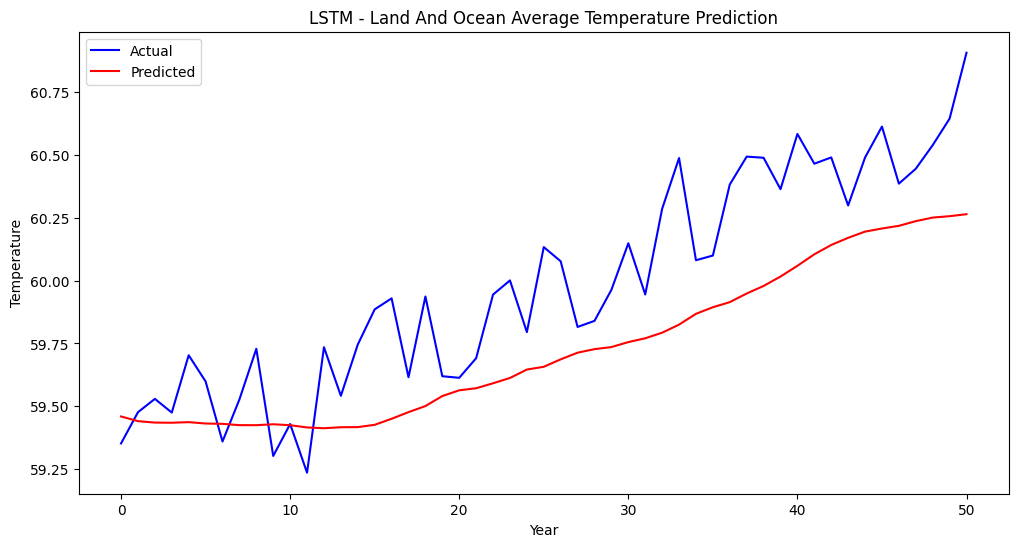

In [43]:
temp_column_and_ocean = 'LandAndOceanAverageTemperature'

# Scaling the data
scaler_and_ocean = MinMaxScaler(feature_range=(0, 1))
scaled_data_and_ocean = scaler_and_ocean.fit_transform(cleaned_climate_df[[temp_column_and_ocean]].values)

# Create a dataset with a lookback window of 12 months (1 year)
lookback = 12

def create_dataset(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_and_ocean, y_and_ocean = create_dataset(scaled_data_and_ocean, lookback)

# Reshaping input data to be 3D for LSTM [samples, time steps, features]
X_and_ocean = X_and_ocean.reshape(X_and_ocean.shape[0], X_and_ocean.shape[1], 1)

# Split the data into training and test sets
train_size_and_ocean = int(len(X_and_ocean) * 0.8)
X_train_and_ocean, X_test_and_ocean = X_and_ocean[:train_size_and_ocean], X_and_ocean[train_size_and_ocean:]
y_train_and_ocean, y_test_and_ocean = y_and_ocean[:train_size_and_ocean], y_and_ocean[train_size_and_ocean:]

# Build the LSTM model for LandAndOceanAverageTemperature
model_and_ocean = Sequential()
model_and_ocean.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_and_ocean.shape[1], 1)))
model_and_ocean.add(Dropout(0.2))
model_and_ocean.add(LSTM(units=50, return_sequences=False))
model_and_ocean.add(Dropout(0.2))
model_and_ocean.add(Dense(units=1))

model_and_ocean.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_and_ocean.fit(X_train_and_ocean, y_train_and_ocean, epochs=20, batch_size=32)

# Make predictions
predictions_and_ocean = model_and_ocean.predict(X_test_and_ocean)
predictions_and_ocean = scaler_and_ocean.inverse_transform(predictions_and_ocean)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_and_ocean)), scaler_and_ocean.inverse_transform(y_test_and_ocean.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(range(len(predictions_and_ocean)), predictions_and_ocean, color='red', label='Predicted')
plt.title('LSTM - Land And Ocean Average Temperature Prediction')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()

# Evaluate performance
mae_lstm3 = mean_absolute_error(scaler_and_ocean.inverse_transform(y_test_and_ocean.reshape(-1, 1)), predictions_and_ocean)
mse_lstm3 = mean_squared_error(scaler_and_ocean.inverse_transform(y_test_and_ocean.reshape(-1, 1)), predictions_and_ocean)
rmse_lstm3 = np.sqrt(mse_lstm3)

print(f'LSTM Model MAE for LandAndOceanAverageTemperature: {mae_lstm3}')
print(f'LSTM Model MSE for LandAndOceanAverageTemperature: {mse_lstm3}')
print(f'LSTM Model RMSE for LandAndOceanAverageTemperature: {rmse_lstm3}')


## Gaussian Process Regression (GPR) for Time Series

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


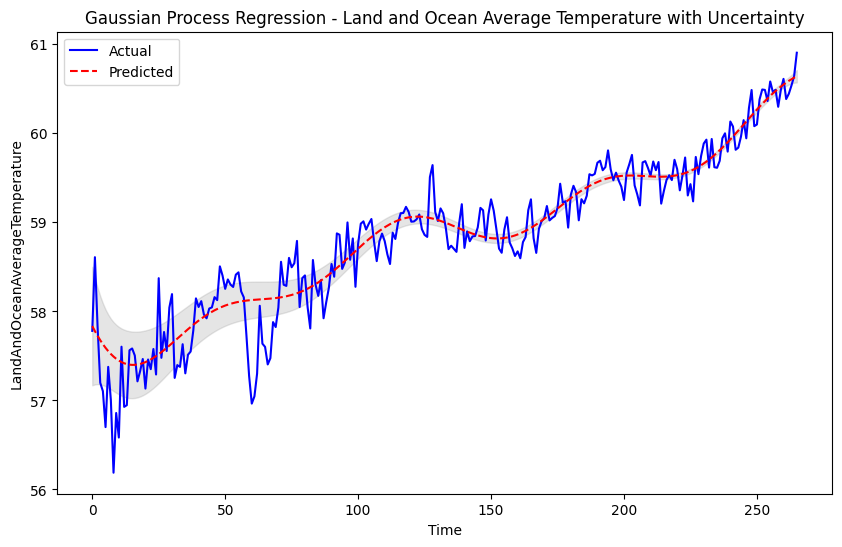

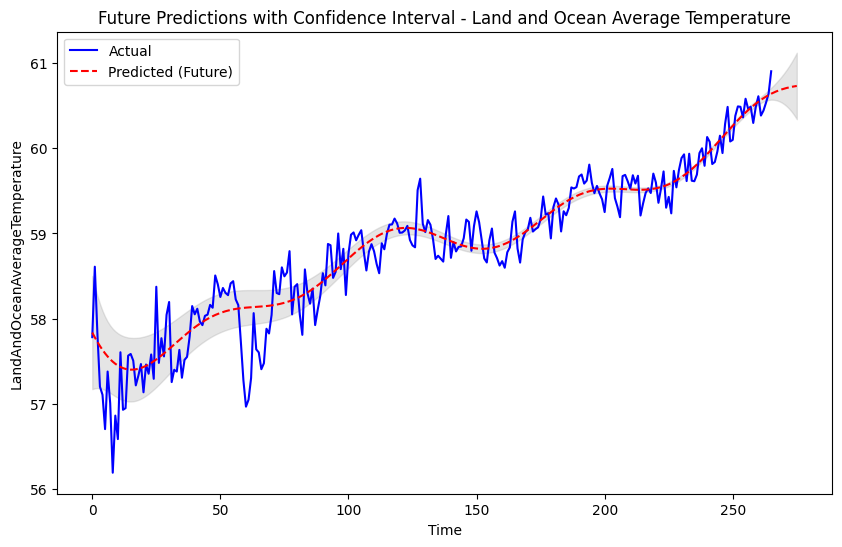

Gaussian Process Regression Model MAE for LandAndOceanAverageTemperature: 0.2091404576726182
Gaussian Process Regression Model MSE for LandAndOceanAverageTemperature: 0.08416102623481948
Gaussian Process Regression Model RMSE for LandAndOceanAverageTemperature: 0.29010519856565736


In [44]:
target_column = 'LandAndOceanAverageTemperature'
uncertainty_column = 'LandAndOceanAverageTemperatureUncertainty'

# Extract the temperature values and uncertainty values
data_values = cleaned_climate_df[target_column].values
uncertainty_values = cleaned_climate_df[uncertainty_column].values
time_steps = np.arange(len(cleaned_climate_df)).reshape(-1, 1)  # Reshape to a 2D array for GPR

# Define the kernel: RBF kernel with a constant term (product kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Initialize the GaussianProcessRegressor with the kernel and noise level
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=uncertainty_values ** 2)

# Fit the model to the data
gp.fit(time_steps, data_values)

# Make predictions on the training data (and future steps if needed)
predicted_values, sigma = gp.predict(time_steps, return_std=True)

# Calculate the 95% Confidence Interval (CI)
confidence_interval_lower = predicted_values - 1.96 * sigma
confidence_interval_upper = predicted_values + 1.96 * sigma

# Plot the actual vs predicted values with uncertainty bounds (confidence interval)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(time_steps, predicted_values, label='Predicted', color='red', linestyle='--')

# Plot the 95% confidence interval
plt.fill_between(time_steps.flatten(), confidence_interval_lower, confidence_interval_upper, color='gray', alpha=0.2)

plt.title("Gaussian Process Regression - Land and Ocean Average Temperature with Uncertainty")
plt.xlabel("Time")
plt.ylabel("LandAndOceanAverageTemperature")
plt.legend()
plt.show()

# Predict future values for the next 10 years
future_time_steps = np.arange(len(cleaned_climate_df), len(cleaned_climate_df) + 10).reshape(-1, 1)
future_predictions, future_sigma = gp.predict(future_time_steps, return_std=True)

# Calculate the 95% confidence interval for future predictions
future_confidence_interval_lower = future_predictions - 1.96 * future_sigma
future_confidence_interval_upper = future_predictions + 1.96 * future_sigma

# Plot future predictions with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data_values, label='Actual', color='blue')
plt.plot(np.concatenate((time_steps, future_time_steps)),
         np.concatenate((predicted_values, future_predictions)),
         label='Predicted (Future)', color='red', linestyle='--')

# Plot the 95% confidence interval for future predictions
plt.fill_between(np.concatenate((time_steps.flatten(), future_time_steps.flatten())),
                 np.concatenate((confidence_interval_lower, future_confidence_interval_lower)),
                 np.concatenate((confidence_interval_upper, future_confidence_interval_upper)),
                 color='gray', alpha=0.2)

plt.title("Future Predictions with Confidence Interval - Land and Ocean Average Temperature")
plt.xlabel("Time")
plt.ylabel("LandAndOceanAverageTemperature")
plt.legend()
plt.show()

# Calculate the model performance metrics (MAE, MSE, RMSE)
mae_gpr3 = mean_absolute_error(data_values, predicted_values)
mse_gpr3 = mean_squared_error(data_values, predicted_values)
rmse_gpr3 = np.sqrt(mse_gpr3)

# Print the metrics
print(f'Gaussian Process Regression Model MAE for LandAndOceanAverageTemperature: {mae_gpr3}')
print(f'Gaussian Process Regression Model MSE for LandAndOceanAverageTemperature: {mse_gpr3}')
print(f'Gaussian Process Regression Model RMSE for LandAndOceanAverageTemperature: {rmse_gpr3}')


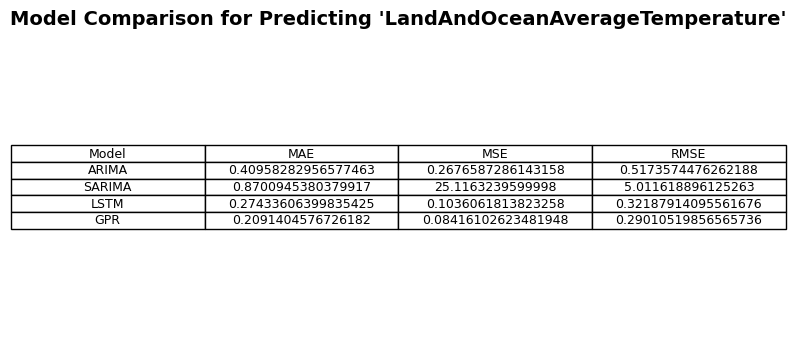

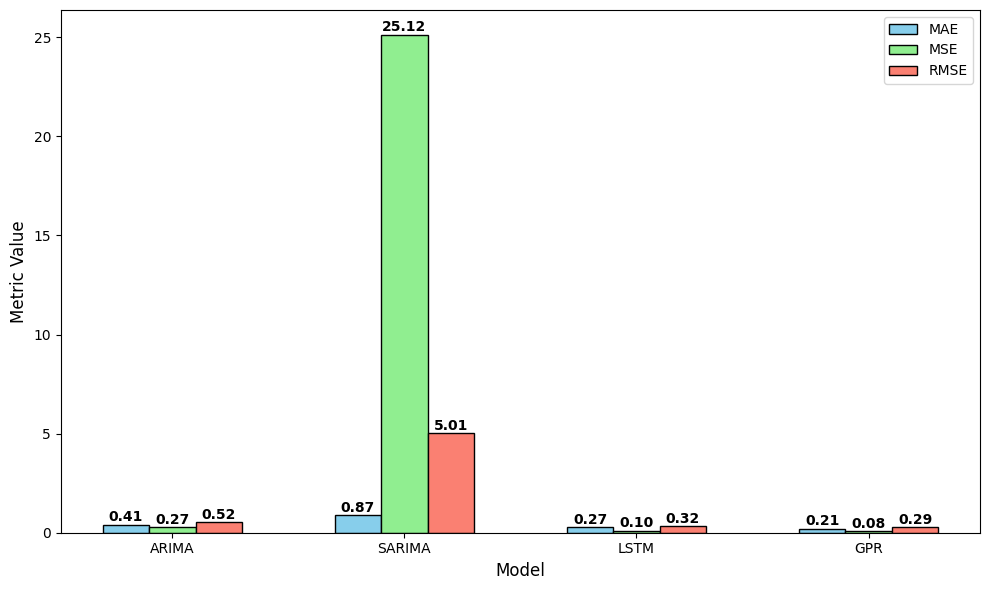

In [45]:
# Define the evaluation metrics for each model (excluding Random Forest)
results = {
    "Model": ["ARIMA", "SARIMA", "LSTM", "GPR"],
    "MAE": [mae_ar3, mae_sar3, mae_lstm3, mae_gpr3],
    "MSE": [mse_ar3, mse_sar3, mse_lstm3, mse_gpr3],
    "RMSE": [rmse_ar3, rmse_sar3, rmse_lstm3, rmse_gpr3]
}

# Create DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Plot the table without any colors (just gridlines)
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

# Adding a title
plt.title("Model Comparison for Predicting 'LandAndOceanAverageTemperature'", fontsize=14, fontweight='bold')

# Show the table
plt.show()

# Plotting the bar chart for comparison of MAE, MSE, and RMSE
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for the comparison
bar_width = 0.2
index = range(len(results_df))

# Positioning for each metric's bar
bar_positions = {
    "MAE": [x - bar_width for x in index],
    "MSE": [x for x in index],
    "RMSE": [x + bar_width for x in index]
}

# Plotting bars for each metric (MAE, MSE, RMSE)
mae_bars = ax.bar(bar_positions["MAE"], results_df["MAE"], width=bar_width, label="MAE", color='skyblue', edgecolor='black')
mse_bars = ax.bar(bar_positions["MSE"], results_df["MSE"], width=bar_width, label="MSE", color='lightgreen', edgecolor='black')
rmse_bars = ax.bar(bar_positions["RMSE"], results_df["RMSE"], width=bar_width, label="RMSE", color='salmon', edgecolor='black')

# Adding the values on top of the bars
for bars, values in zip([mae_bars, mse_bars, rmse_bars], [results_df["MAE"], results_df["MSE"], results_df["RMSE"]]):
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{value:.2f}',  # Adjust 0.02 for spacing
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Setting the x-axis labels (models)
ax.set_xticks(index)
ax.set_xticklabels(results_df["Model"])

# Adding labels and title
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Metric Value', fontsize=12)

# Adding a legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


### Conclusion